# Statistical Methods for Decision Making - Project

## Problem 1

### Context

##### Austo Motor Company, a prominent automobile manufacturer known for its SUV, Sedan, and Hatchback models, addressed concerns about the effectiveness of its current marketing campaign during its latest board meeting.

### Objective

##### They aim to examine the data to gain a comprehensive understanding of customer demand, ultimately enhancing their customer experience. Conduct data analysis to uncover insights that will assist the company in enhancing its business operations.

### Problem 1 - Data Overview

##### Import the libraries - Load the data - Check the structure of the data - Check the types of the data - Check for and treat (if needed) missing values - Check the statistical summary - Check for and treat (if needed) data irregularities - Observations and Insights

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data
df = pd.read_csv('Dataset 1_Austo Automobiles.csv')

In [3]:
df.head()

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                 4   
1   53   Femal   Salaried        Married  Post Graduate                 4   
2   53  Female   Salaried        Married  Post Graduate                 3   
3   53  Female   Salaried        Married       Graduate                 2   
4   53    Male   Salaried        Married  Post Graduate                 3   

  Personal_loan House_loan Partner_working  Salary  Partner_salary  \
0            No         No             Yes   99300         70700.0   
1           Yes         No             Yes   95500         70300.0   
2            No         No             Yes   97300         60700.0   
3           Yes         No             Yes   72500         70300.0   
4            No         No             Yes   79700         60200.0   

   Total_salary  Price Make  
0        170000  61000  SUV  
1        165800  61000  SUV  
2        158000  57000  SUV  
3        142800  61000  SUV  
4        139900  57000  SUV

In [4]:
# Checking structure of data
df.shape

(1581, 14)

##### We have **1581** rows and **14** columns in the dataset

In [5]:
# Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


##### We have 8 object, 5 int and 1 float data types in the dataset. Also we can see that there are null values in Gender and Partner_salary columns

In [6]:
# Checking Null values
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [7]:
len(df[(df['Partner_salary'].isnull()) & (df['Partner_working'] == 'Yes')])

16

In [8]:
df[(df['Partner_salary'].isnull()) & (df['Partner_working'] == 'Yes')]

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
43     52    Male   Salaried        Married  Post Graduate                 3   
49     52  Female   Business        Married  Post Graduate                 4   
59     54    Male   Salaried        Married       Graduate                 3   
111    48  Female   Business        Married       Graduate                 3   
209    43  Female   Salaried        Married       Graduate                 4   
284    41  Female   Business        Married  Post Graduate                 2   
339    39    Male   Salaried        Married  Post Graduate                 2   
376    38    Male   Salaried        Married  Post Graduate                 2   
424    37  Female   Salaried        Married       Graduate                 2   
444    36    Male   Business        Married  Post Graduate                 2   
554    33    Male   Salaried        Married       Graduate                 2   
654    30    Male   Business        Married  Post Graduate                 4   
779    29    Male   Salaried        Married       Graduate                 3   
1345   24    Male   Salaried        Married       Graduate                 3   
1349   24    Male   Business        Married       Graduate                 3   
1546   22    Male   Business        Married       Graduate                 3   

     Personal_loan House_loan Partner_working  Salary  Partner_salary  \
43              No         No             Yes   87600             NaN   
49              No         No             Yes   90300             NaN   
59             Yes         No             Yes   80600             NaN   
111             No         No             Yes   90300             NaN   
209            Yes         No             Yes   53400             NaN   
284             No         No             Yes   70500             NaN   
339            Yes         No             Yes   76800             NaN   
376            Yes         No             Yes   79000             NaN   
424            Yes        Yes             Yes   62000             NaN   
444             No         No             Yes   72300             NaN   
554             No         No             Yes   41600             NaN   
654            Yes        Yes             Yes   64700             NaN   
779             No        Yes             Yes   59000             NaN   
1345           Yes         No             Yes   34600             NaN   
1349           Yes         No             Yes   32400             NaN   
1546           Yes         No             Yes   32600             NaN   

      Total_salary  Price       Make  
43           88200  51000        SUV  
49          170400  69000        SUV  
59           81000  51000        SUV  
111         161100  62000        SUV  
209         123900  64000        SUV  
284         105800  33000      Sedan  
339         115400  50000      Sedan  
376         117400  46000      Sedan  
424         100700  46000      Sedan  
444         112400  48000      Sedan  
554          70100  48000      Sedan  
654          93200  30000  Hatchback  
779          87700  29000  Hatchback  
1345         58800  20000  Hatchback  
1349         58200  18000      Sedan  
1546         59300  20000  Hatchback

In [9]:
len(df[(df['Partner_salary'].isnull()) & (df['Partner_working'] == 'No')])

90

In [10]:
filtered_df = df[(df['Partner_salary'].isnull()) & (df['Partner_working'] == 'No')]
result = filtered_df[['Salary', 'Partner_salary', 'Total_salary']]
result

Salary  Partner_salary  Total_salary
40     72100             NaN         72100
115    78000             NaN         78000
163    71300             NaN         71300
164    56700             NaN         56700
165    55100             NaN         55100
...      ...             ...           ...
1559   52100             NaN         52100
1567   39700             NaN         39700
1568   38000             NaN         38000
1577   32000             NaN         32000
1579   32200             NaN         32200

[90 rows x 3 columns]

In [11]:
equal_salaries = result['Salary'].equals(result['Total_salary'])
equal_salaries

True

##### From the above we can clearly see that there are **53** null values in the Gender column and **106** null values in the Partner_salary column out of which **90** null values does not have their partner working and **16** values have their partner working. Then we compared Total_salary and salary of those 90 rows and found all the 90 values are equal. So we can proceed with imputing Total_salary - salary for those 106 columns

In [12]:
# Imputing the categorical varibales with Mode and numerical variables with Median
df['Gender'].value_counts()

Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64

In [13]:
df['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

##### We can some discrepencies in the Gender column. We will resolve this later. For now, our focus is on handling missing values

In [14]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [15]:
df['Partner_salary'].median()

25600.0

##### We will impute Gender column (categorical) with **mode** value and Partner_salary column (numerical) with **Total_salary - Salary** value

In [16]:
df['Gender'] = np.where(df['Gender'].notna(), df['Gender'], df['Gender'].mode()[0])
df['Gender'].value_counts()

Gender
Male      1252
Female     327
Femal        1
Femle        1
Name: count, dtype: int64

In [17]:
df['Partner_salary'] = np.where(df['Partner_salary'].notna(), df['Partner_salary'], df['Total_salary'] - df['Salary'])
df['Partner_salary'].median()

25100.0

In [18]:
# Checking Null values again
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

##### From the above we can see that there are no null values in the dataset after the imputation

In [19]:
#  Checking Duplicates
df.duplicated().sum()

0

##### There are no duplicates in the dataset

In [20]:
#  Checking Statistical Summary
df.describe(include='all').T

count unique            top  freq          mean  \
Age               1581.0    NaN            NaN   NaN     31.922201   
Gender              1581      4           Male  1252           NaN   
Profession          1581      2       Salaried   896           NaN   
Marital_status      1581      2        Married  1443           NaN   
Education           1581      2  Post Graduate   985           NaN   
No_of_Dependents  1581.0    NaN            NaN   NaN      2.457938   
Personal_loan       1581      2            Yes   792           NaN   
House_loan          1581      2             No  1054           NaN   
Partner_working     1581      2            Yes   868           NaN   
Salary            1581.0    NaN            NaN   NaN  60392.220114   
Partner_salary    1581.0    NaN            NaN   NaN  19233.776091   
Total_salary      1581.0    NaN            NaN   NaN  79625.996205   
Price             1581.0    NaN            NaN   NaN   35597.72296   
Make                1581      3          Sedan   702           NaN   

                           std      min      25%      50%      75%       max  
Age                   8.425978     22.0     25.0     29.0     38.0      54.0  
Gender                     NaN      NaN      NaN      NaN      NaN       NaN  
Profession                 NaN      NaN      NaN      NaN      NaN       NaN  
Marital_status             NaN      NaN      NaN      NaN      NaN       NaN  
Education                  NaN      NaN      NaN      NaN      NaN       NaN  
No_of_Dependents      0.943483      0.0      2.0      2.0      3.0       4.0  
Personal_loan              NaN      NaN      NaN      NaN      NaN       NaN  
House_loan                 NaN      NaN      NaN      NaN      NaN       NaN  
Partner_working            NaN      NaN      NaN      NaN      NaN       NaN  
Salary            14674.825044  30000.0  51900.0  59500.0  71800.0   99300.0  
Partner_salary    19670.391171      0.0      0.0  25100.0  38100.0   80500.0  
Total_salary      25545.857768  30000.0  60500.0  78000.0  95900.0  171000.0  
Price             13633.636545  18000.0  25000.0  31000.0  47000.0   70000.0  
Make                       NaN      NaN      NaN      NaN      NaN       NaN

In [21]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

In [22]:
# Inspecting data types and unique values for irregularities
print(df.dtypes)
print('\n')
# Check unique values for categorical columns
for col in ['Gender','Profession','Marital_status','Education','No_of_Dependents','Personal_loan','House_loan','Partner_working','Make']:
    print(f'Unique values in {col}:', df[col].unique())

Age                   int64
Gender               object
Profession           object
Marital_status       object
Education            object
No_of_Dependents      int64
Personal_loan        object
House_loan           object
Partner_working      object
Salary                int64
Partner_salary      float64
Total_salary          int64
Price                 int64
Make                 object
dtype: object


Unique values in Gender: ['Male' 'Femal' 'Female' 'Femle']
Unique values in Profession: ['Business' 'Salaried']
Unique values in Marital_status: ['Married' 'Single']
Unique values in Education: ['Post Graduate' 'Graduate']
Unique values in No_of_Dependents: [4 3 2 1 0]
Unique values in Personal_loan: ['No' 'Yes']
Unique values in House_loan: ['No' 'Yes']
Unique values in Partner_working: ['Yes' 'No']
Unique values in Make: ['SUV' 'Sedan' 'Hatchback']


In [23]:
# Replacing the irregularities in Gender column
df['Gender'] = df['Gender'].replace({'Femal': 'Female', 'Femle': 'Female'})

# Verify the correction
print(df['Gender'].unique())

['Male' 'Female']


In [24]:
# Converting Partner_salary column to integer type
df['Partner_salary'] = df['Partner_salary'].astype('int64')

# Creating a new Total Salary Column
df['Total Salary'] = df['Salary'] + df['Partner_salary']

In [25]:
# Checking for any discrepencies in the Total_salary column
df[df['Total Salary'] != df['Total_salary']]

Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make, Total Salary]
Index: []

##### From the above we can clearly see that there are **No** incorrect calculations in the **Total_salary** column. So we can drop either of the the Total Salary columns (Total_salary or Total Salary)

In [26]:
df = df.drop('Total_salary', axis=1)

In [27]:
df.head()

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                 4   
1   53  Female   Salaried        Married  Post Graduate                 4   
2   53  Female   Salaried        Married  Post Graduate                 3   
3   53  Female   Salaried        Married       Graduate                 2   
4   53    Male   Salaried        Married  Post Graduate                 3   

  Personal_loan House_loan Partner_working  Salary  Partner_salary  Price  \
0            No         No             Yes   99300           70700  61000   
1           Yes         No             Yes   95500           70300  61000   
2            No         No             Yes   97300           60700  57000   
3           Yes         No             Yes   72500           70300  61000   
4            No         No             Yes   79700           60200  57000   

  Make  Total Salary  
0  SUV        170000  
1  SUV        165800  
2  SUV        158000  
3  SUV        142800  
4  SUV        139900

In [28]:
df.tail()

Age Gender Profession Marital_status Education  No_of_Dependents  \
1576   22   Male   Salaried         Single  Graduate                 2   
1577   22   Male   Business        Married  Graduate                 4   
1578   22   Male   Business         Single  Graduate                 2   
1579   22   Male   Business        Married  Graduate                 3   
1580   22   Male   Salaried        Married  Graduate                 4   

     Personal_loan House_loan Partner_working  Salary  Partner_salary  Price  \
1576            No        Yes              No   33300               0  27000   
1577            No         No              No   32000               0  31000   
1578            No        Yes              No   32900               0  30000   
1579           Yes        Yes              No   32200               0  24000   
1580            No         No              No   31600               0  31000   

           Make  Total Salary  
1576  Hatchback         33300  
1577  Hatchback         32000  
1578  Hatchback         32900  
1579  Hatchback         32200  
1580  Hatchback         31600

In [29]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Price', 'Make', 'Total Salary'],
      dtype='object')

In [30]:
# Checking other discrepencies or irregularities
df1= df[(df['Partner_working']=='No') & (df['Partner_salary'] != 0) & (df['Marital_status'] == 'Single')]
len(df1)

0

In [31]:
# Checking other discrepencies or irregularities
df2 = df[(df['Partner_working']=='No') & (df['Partner_salary'] != 0) ]
len(df2)

0

In [32]:
df.select_dtypes('int').columns

Index(['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Price',
       'Total Salary'],
      dtype='object')

In [33]:
df.select_dtypes('object').columns

Index(['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan',
       'House_loan', 'Partner_working', 'Make'],
      dtype='object')

In [34]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Price', 'Make', 'Total Salary'],
      dtype='object')

In [35]:
df.describe(include='all').T

count unique            top  freq          mean  \
Age               1581.0    NaN            NaN   NaN     31.922201   
Gender              1581      2           Male  1252           NaN   
Profession          1581      2       Salaried   896           NaN   
Marital_status      1581      2        Married  1443           NaN   
Education           1581      2  Post Graduate   985           NaN   
No_of_Dependents  1581.0    NaN            NaN   NaN      2.457938   
Personal_loan       1581      2            Yes   792           NaN   
House_loan          1581      2             No  1054           NaN   
Partner_working     1581      2            Yes   868           NaN   
Salary            1581.0    NaN            NaN   NaN  60392.220114   
Partner_salary    1581.0    NaN            NaN   NaN  19233.776091   
Price             1581.0    NaN            NaN   NaN   35597.72296   
Make                1581      3          Sedan   702           NaN   
Total Salary      1581.0    NaN            NaN   NaN  79625.996205   

                           std      min      25%      50%      75%       max  
Age                   8.425978     22.0     25.0     29.0     38.0      54.0  
Gender                     NaN      NaN      NaN      NaN      NaN       NaN  
Profession                 NaN      NaN      NaN      NaN      NaN       NaN  
Marital_status             NaN      NaN      NaN      NaN      NaN       NaN  
Education                  NaN      NaN      NaN      NaN      NaN       NaN  
No_of_Dependents      0.943483      0.0      2.0      2.0      3.0       4.0  
Personal_loan              NaN      NaN      NaN      NaN      NaN       NaN  
House_loan                 NaN      NaN      NaN      NaN      NaN       NaN  
Partner_working            NaN      NaN      NaN      NaN      NaN       NaN  
Salary            14674.825044  30000.0  51900.0  59500.0  71800.0   99300.0  
Partner_salary    19670.391171      0.0      0.0  25100.0  38100.0   80500.0  
Price             13633.636545  18000.0  25000.0  31000.0  47000.0   70000.0  
Make                       NaN      NaN      NaN      NaN      NaN       NaN  
Total Salary      25545.857768  30000.0  60500.0  78000.0  95900.0  171000.0

#### <span style="text-decoration: underline;">Observations and Insights:-</span>

 Based on the data cleaning and exploration we've conducted, here are some key observations and insights:

**Gender Discrepancy and Correction:** We identified and corrected discrepancies in the "Gender" column, standardizing the values to 'Male', 'Female', and handled missing values. This correction ensures accurate gender representation in the dataset.

**Missing Values:** The dataset contained missing values in "Gender" and "Partner_salary" columns. We handled the missing values using mode and Total_salary - Salary imputation for "Gender" and "Partner_Salary" respectively.

**Data Consistency:** Other columns such as 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'House_loan', 'Partner_working', and 'Make' showed consistent and expected unique values, indicating good data quality in these fields.

**Data Types:** The dataset primarily consists of categorical data ('Gender', 'Profession', 'Marital_status', 'Education', Personal_loan', 'House_loan', 'Partner_working', 'Make') and numerical data ('Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Price', 'Total Salary'). This diversity in data types suggests that analysis could include both statistical summaries and categorical data analysis.

**Sedan** is the most sold type of car and **Salaried Married males** are the top customers. The median age of customers is **29** and the median salary of customers is **59500**. The median price of cars is **31000**

##### These insights provide a foundation for further analysis, such as exploring relationships between gender and salary, the impact of marital status on car preferences, or the correlation between education level and loan status. Further statistical analysis could uncover more nuanced insights within this dataset.

### Problem 1 - Univariate Analysis
#####  Explore all the variables (categorical and numerical) in the data - Check for and treat (if needed) outliers - Observations and Insights

In [36]:
# numerical variables
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print('Numerical Columns:', numerical_cols,'\n')

# categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print('Categorical Columns:', categorical_cols)

Numerical Columns: ['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Price', 'Total Salary'] 

Categorical Columns: ['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'House_loan', 'Partner_working', 'Make']


In [37]:
for col in categorical_cols:
    print(df[col].value_counts())
    print('\n------------------------------\n')

Male      1252
Female     329
Name: Gender, dtype: int64

------------------------------

Salaried    896
Business    685
Name: Profession, dtype: int64

------------------------------

Married    1443
Single      138
Name: Marital_status, dtype: int64

------------------------------

Post Graduate    985
Graduate         596
Name: Education, dtype: int64

------------------------------

Yes    792
No     789
Name: Personal_loan, dtype: int64

------------------------------

No     1054
Yes     527
Name: House_loan, dtype: int64

------------------------------

Yes    868
No     713
Name: Partner_working, dtype: int64

------------------------------

Sedan        702
Hatchback    582
SUV          297
Name: Make, dtype: int64

------------------------------



### Univariate Analysis of Numerical Variables

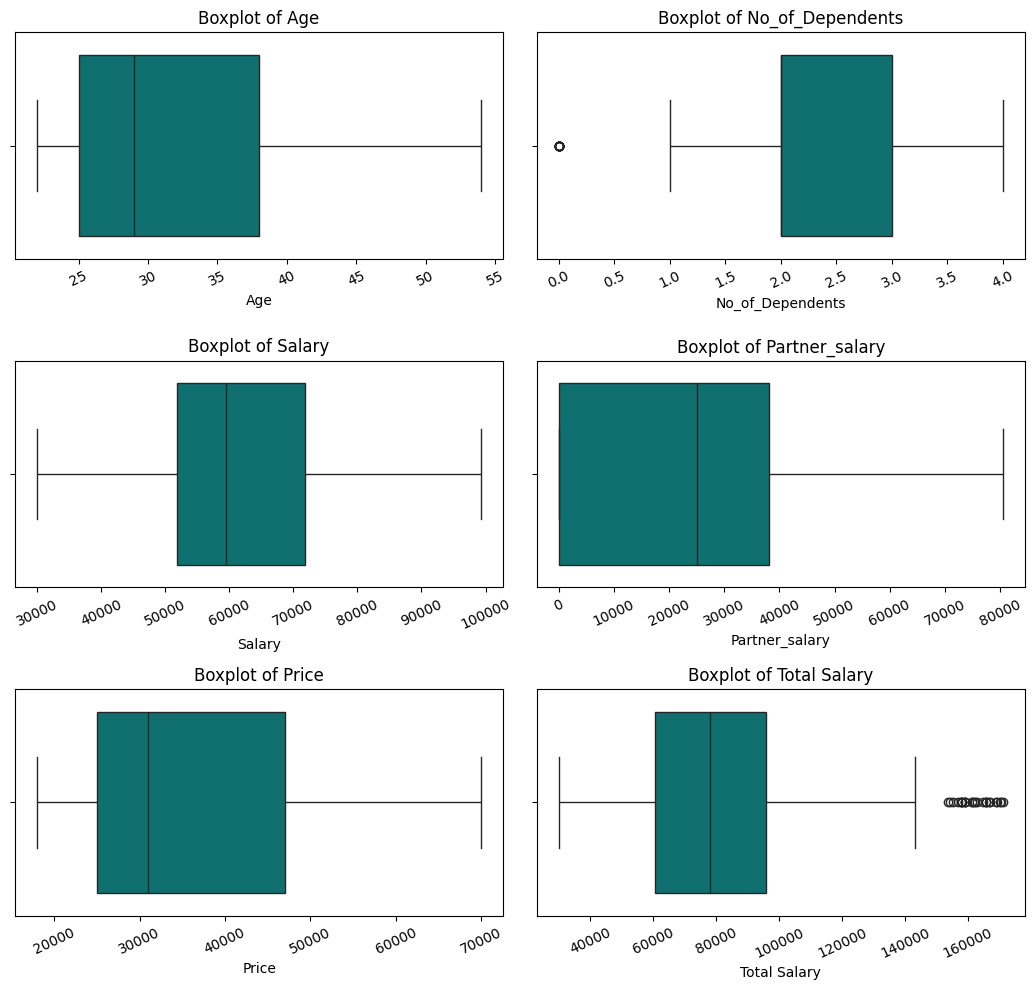

In [38]:
# Setting up the subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10.5, 10));

# Check for outliers in numerical columns
for i, col in enumerate(numerical_cols):
    sns.boxplot(df[col],ax=axes[i//2, i%2],orient='h', color='teal');
    axes[i//2, i%2].set_title(f'Boxplot of {col}');
    axes[i//2, i%2].tick_params(axis='x', rotation=25)

plt.tight_layout();

##### The boxplot of dependents and total salary shows that there are some outliers.  

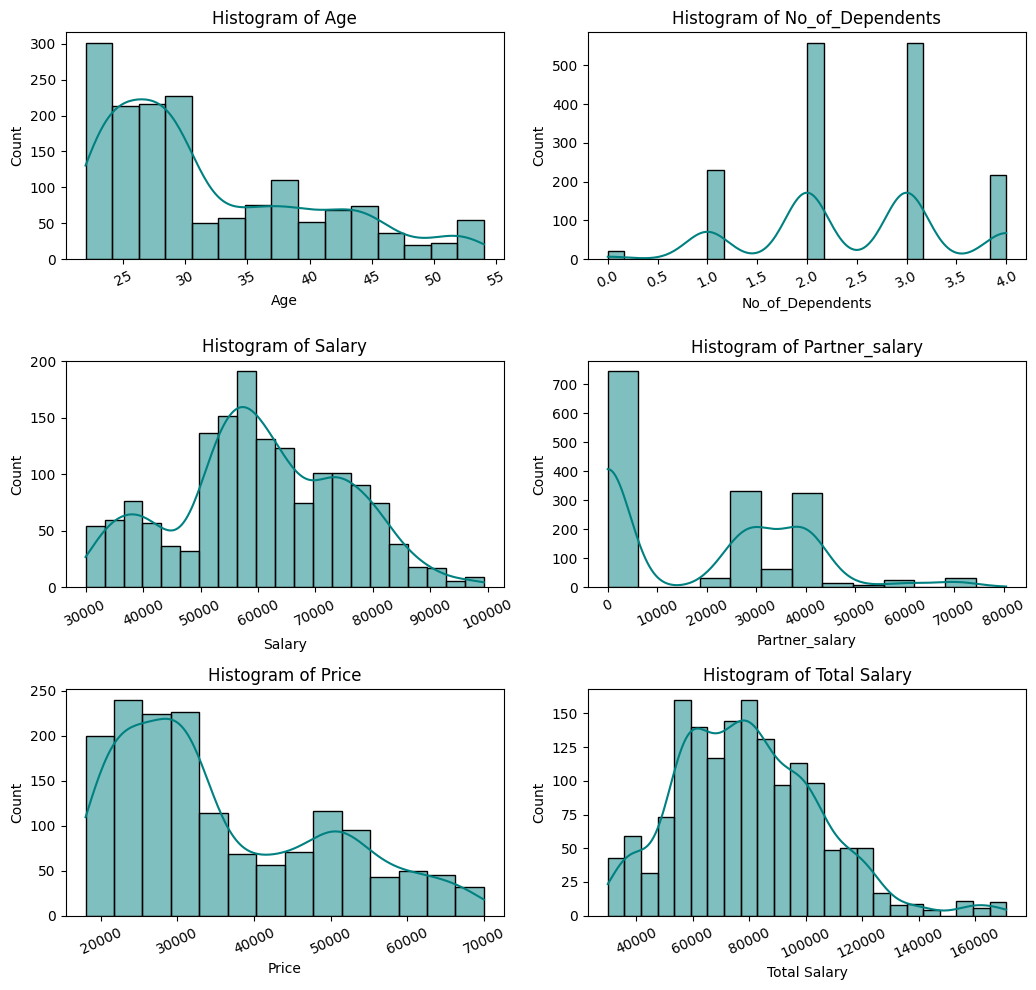

In [39]:
# Histograms
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10.5, 10));
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col],ax=axes[i//2, i%2],kde=True, color='teal');
    axes[i//2, i%2].set_title(f'Histogram of {col}');
    axes[i//2, i%2].tick_params(axis='x', rotation=25)

plt.tight_layout();

### Univariate Analysis of Categorical Variables

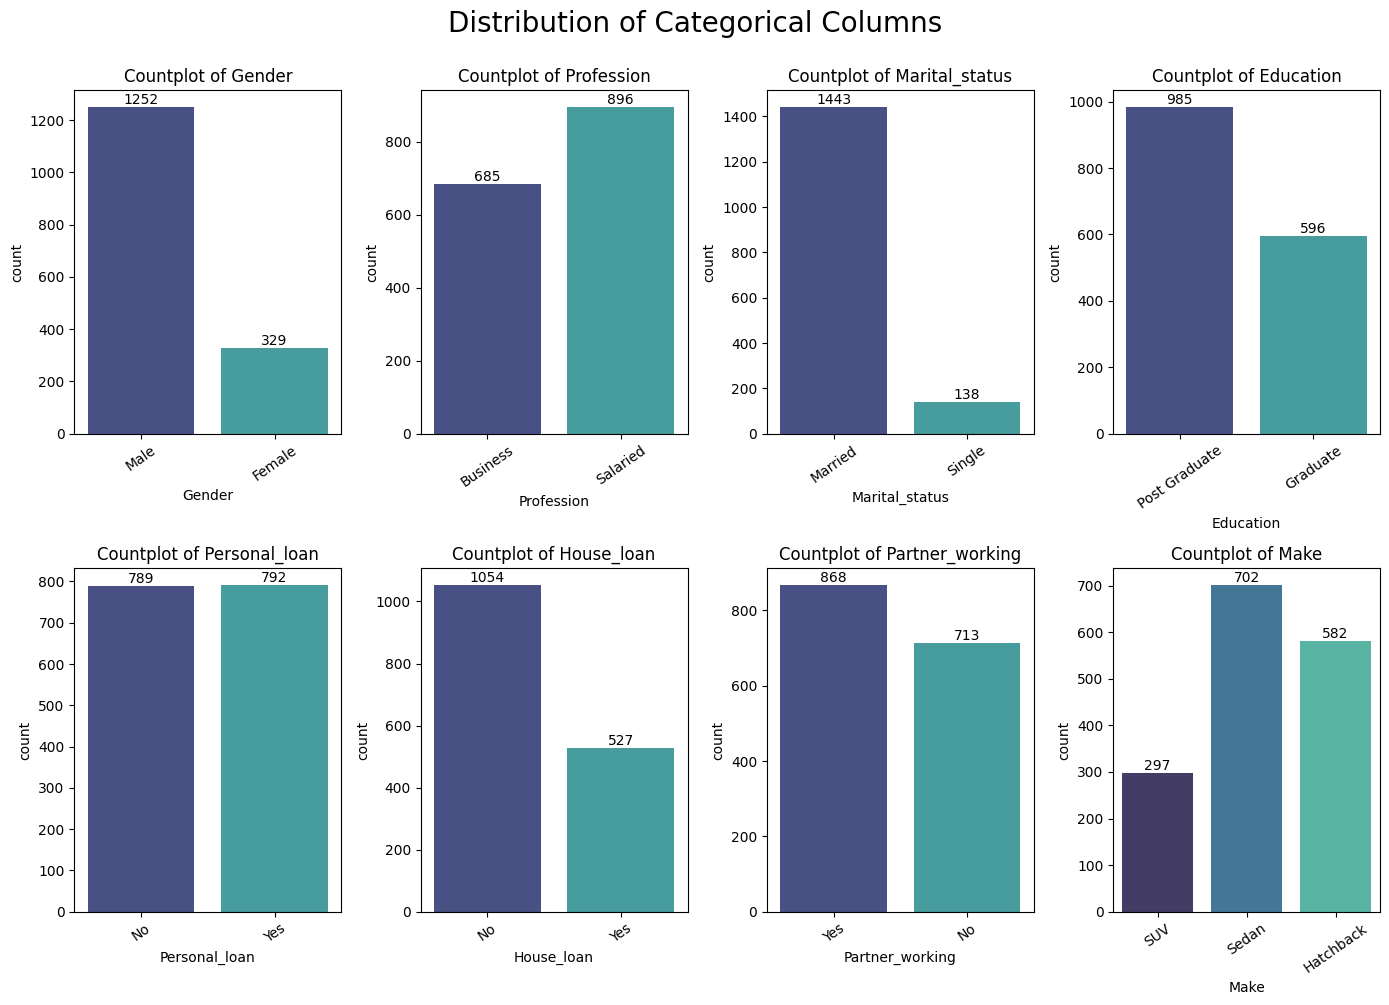

In [105]:
# Setting up the subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14, 10))

plt.suptitle('Distribution of Categorical Columns', fontsize=20, y=1)

# Check for distribution of categorical columns
for i, col in enumerate(categorical_cols):
    ax = axes[i//4, i%4]
    sns.countplot(data=df, x=col, ax=ax, palette='mako')
    ax.set_title(f'Countplot of {col}')
    ax.tick_params(axis='x', rotation=35)

    # Adding annotations
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()

In [41]:
# There are more male customers than female customers.
# The count of salaried professionals exceeds that of business professionals.
# Married customers outnumber single customers.
# The majority of customers have a post-graduation educational qualification.
# The number of customers who opted for a personal loan is approximately equal to those who did not.
# There are more customers without a home loan compared to those with one.
# Customers with working partners made the most car purchases.
# Sedans are the top-selling make, followed by hatchbacks and SUVs.UVs.


In [42]:
df.describe()

Age  No_of_Dependents        Salary  Partner_salary  \
count  1581.000000       1581.000000   1581.000000     1581.000000   
mean     31.922201          2.457938  60392.220114    19233.776091   
std       8.425978          0.943483  14674.825044    19670.391171   
min      22.000000          0.000000  30000.000000        0.000000   
25%      25.000000          2.000000  51900.000000        0.000000   
50%      29.000000          2.000000  59500.000000    25100.000000   
75%      38.000000          3.000000  71800.000000    38100.000000   
max      54.000000          4.000000  99300.000000    80500.000000   

              Price   Total Salary  
count   1581.000000    1581.000000  
mean   35597.722960   79625.996205  
std    13633.636545   25545.857768  
min    18000.000000   30000.000000  
25%    25000.000000   60500.000000  
50%    31000.000000   78000.000000  
75%    47000.000000   95900.000000  
max    70000.000000  171000.000000

#### Treating Outliers

A box plot might visually highlight outliers, but it doesn't necessarily mean it should be treated as an anomaly. Outliers are more relevant when they represent data points significantly deviating from the normal and might be indicative of errors or anomalies in the data. However, a value of 0 for the number of dependents is a legitimate and reasonable observation.

As we saw earlier in the univariate analysis of numerical columns using Box Plot, there are some **outliers** in the **No_of_Dependents** and **Total Salary** columns. Since No_of_Dependents can be zero, we are considering 0 as relevant value and **not outlier**. In case of Total Salary column, the **outlier values are valuable and it is essential for the analysis of high paying customers**. So we are not treating the outliers here.

#### But below steps show how to treat outliers if needed.

In [43]:
 # <!-- Calculate the IQR
 # Q1 = df['Total Salary'].quantile(0.25)
 # Q3 = df['Total Salary'].quantile(0.75)
 # IQR = Q3 - Q1

 # Define thresholds
 # lower_bound = Q1 - 1.5 * IQR
 # upper_bound = Q3 + 1.5 * IQR
 # print(lower_bound,upper_bound)

 # #Treating outliers
 # df['Total Salary'] = np.where(df['Total Salary'] > upper_bound, upper_bound, df['Total Salary'])
 # df['Total Salary'] = np.where(df['Total Salary'] < lower_bound, lower_bound, df['Total Salary'])

 # plt.figure(figsize=(3,3))
 # sns.boxplot(data=df,x='Total Salary',color='teal')
 # plt.title('Box Plot of Total Salary after Outlier Treatment'); -->

#### <span style="text-decoration: underline;">Observations and Insights:-</span>

The exploration of variables in the dataset reveals the following insights:

**1).** Numerical Variables: The dataset contains six numerical columns: 'Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total Salary', and 'Price'. These variables are key for any quantitative analysis, such as understanding salary distributions or price ranges of automobiles.

**2).** Categorical Variables: There are eight categorical columns: 'Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'House_loan', 'Partner_working', and 'Make'. These variables are crucial for segmenting the data and analyzing trends across different groups.

**3).** Outliers Detection: Boxplots were generated for each numerical variable to visually inspect for outliers. Outliers can significantly impact statistical analysis, so it's important to decide whether to keep, remove, or adjust these values based on the analysis of data.

### Problem 1 - Bivariate Analysis
#####  Explore the relationship between all numerical variables - Explore the correlation between all numerical variables - Explore the relationship between categorical vs numerical variables

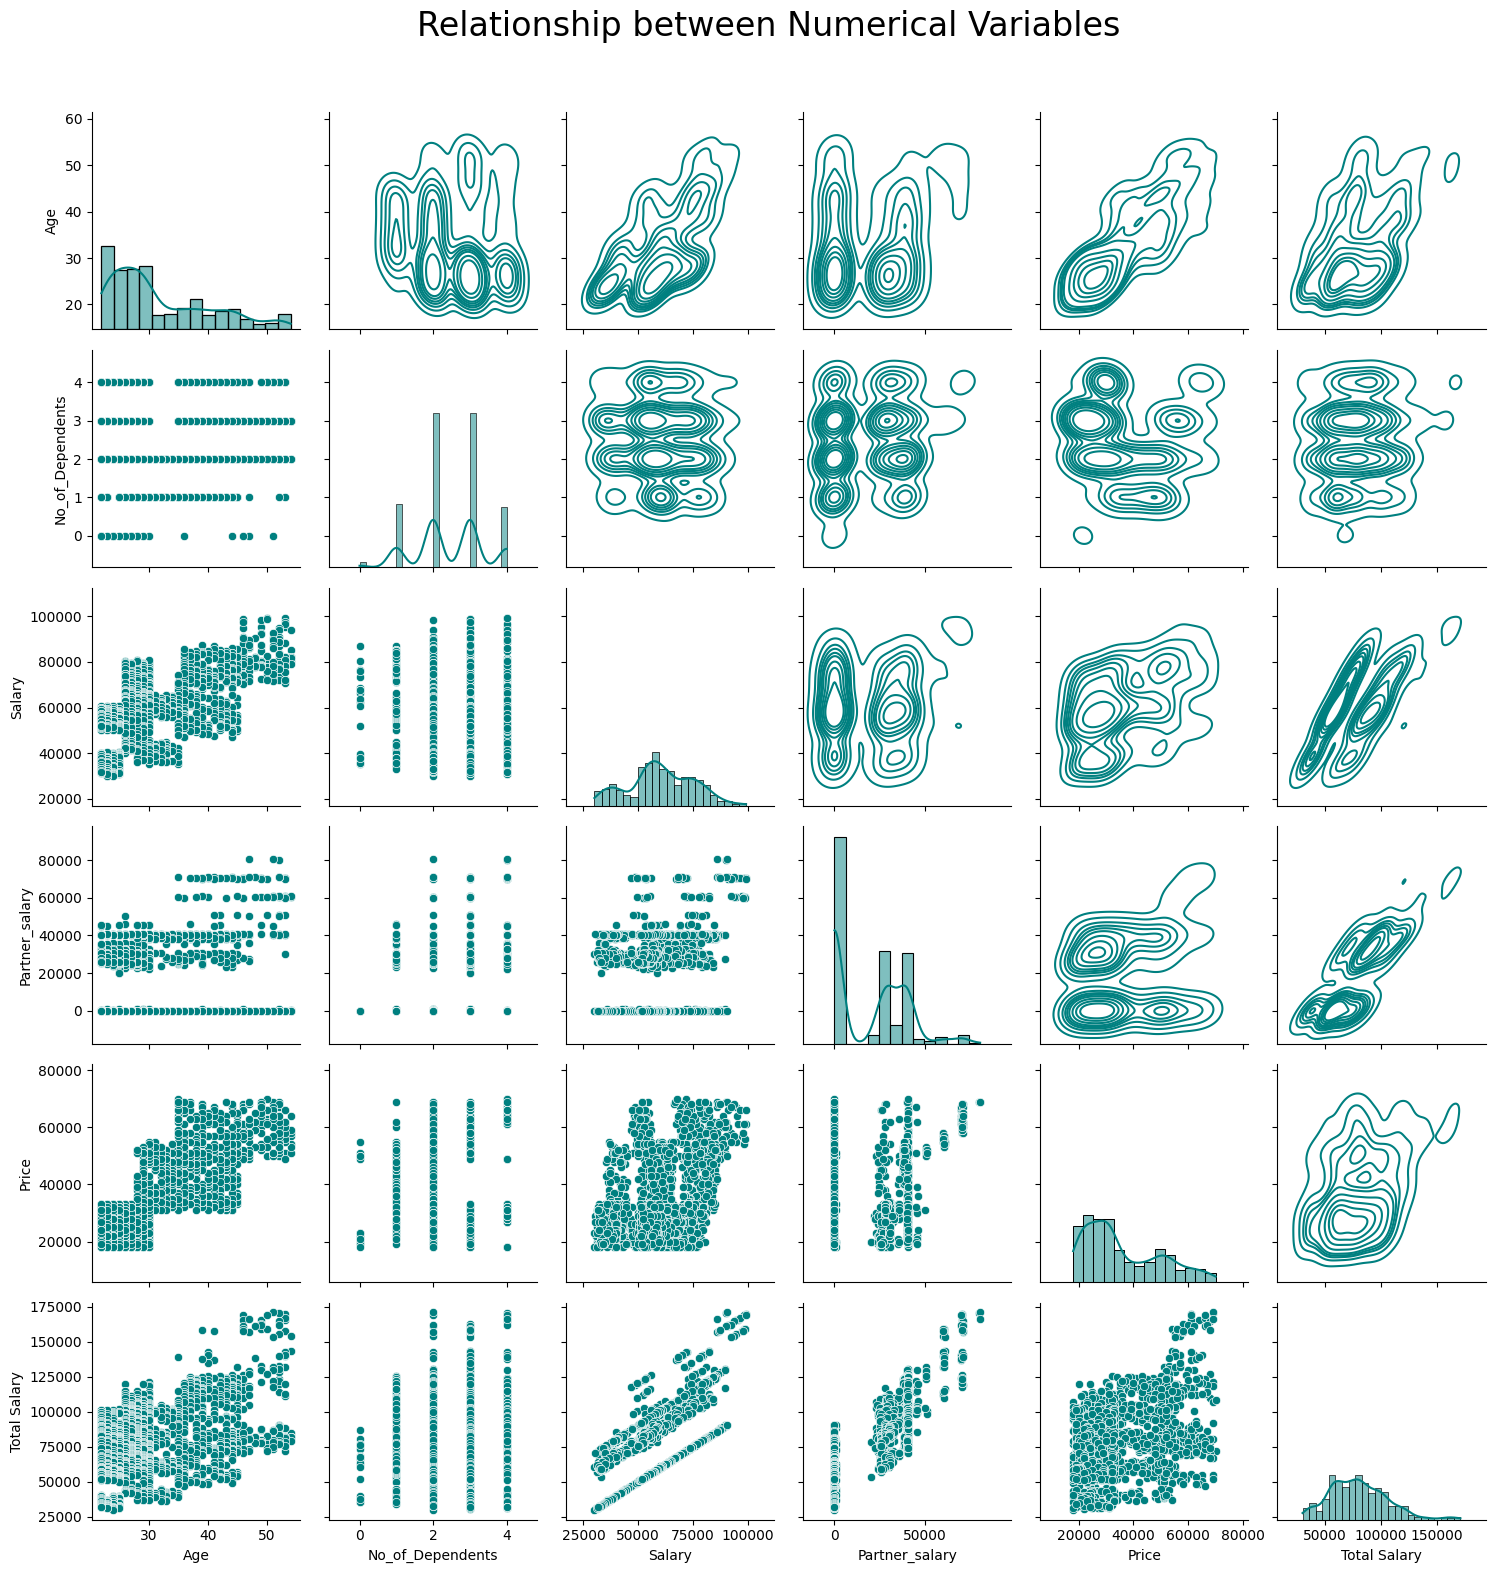

In [44]:
g = sns.PairGrid(df)
g.map_upper(sns.kdeplot, color='teal')
g.map_lower(sns.scatterplot, color='teal')
g.map_diag(sns.histplot, color='teal', kde=True)
g.fig.suptitle('Relationship between Numerical Variables', fontsize=24, y=1.05);

In [45]:
corr_matrix = np.round(df[numerical_cols].corr(),2)
corr_matrix

Age  No_of_Dependents  Salary  Partner_salary  Price  \
Age               1.00             -0.19    0.62            0.14   0.80   
No_of_Dependents -0.19              1.00   -0.03            0.14  -0.14   
Salary            0.62             -0.03    1.00            0.09   0.41   
Partner_salary    0.14              0.14    0.09            1.00   0.17   
Price             0.80             -0.14    0.41            0.17   1.00   
Total Salary      0.46              0.09    0.64            0.82   0.37   

                  Total Salary  
Age                       0.46  
No_of_Dependents          0.09  
Salary                    0.64  
Partner_salary            0.82  
Price                     0.37  
Total Salary              1.00

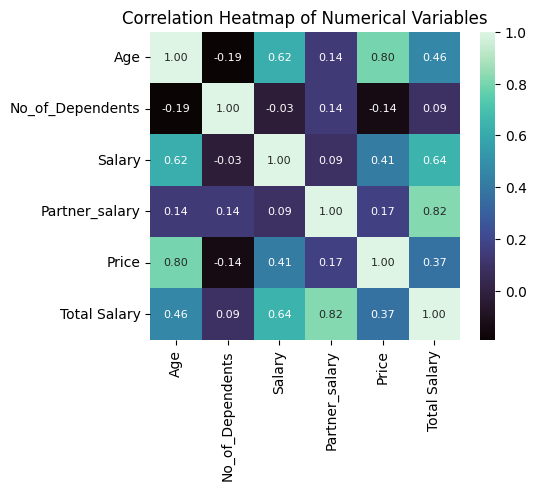

In [46]:
# Correlation matrix for numerical variables
plt.figure(figsize=(5, 4));
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='mako',annot_kws={"size": 8});
plt.title('Correlation Heatmap of Numerical Variables');

In [47]:
categorical_cols

['Gender',
 'Profession',
 'Marital_status',
 'Education',
 'Personal_loan',
 'House_loan',
 'Partner_working',
 'Make']

#### Gender vs Numerical Variables

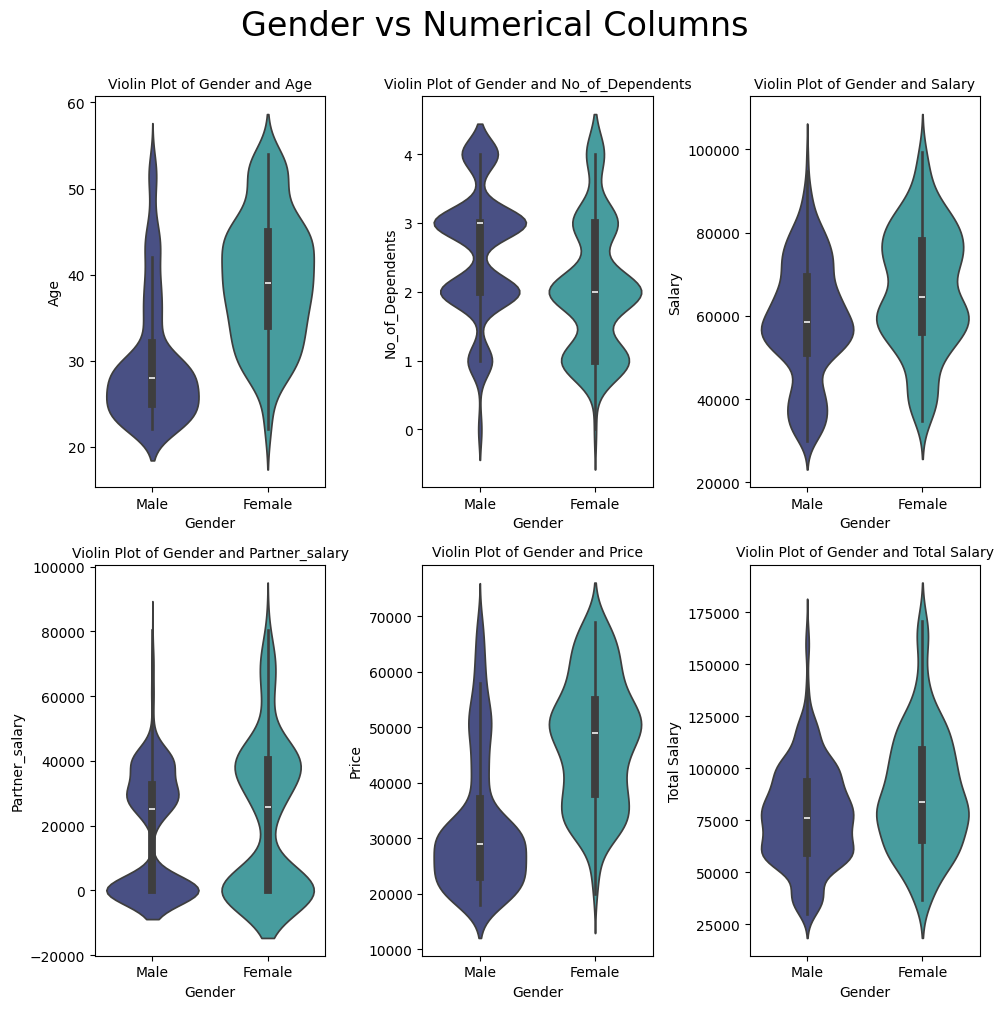

In [48]:
# Setting up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10));

# Bivariate analysis: Gender vs Numerical variables
for i, num_col in enumerate(numerical_cols):
    sns.violinplot(x='Gender', y=num_col, data=df, palette='mako',ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Violin Plot of Gender and {num_col}',fontsize=10)
    # axes[i//3, i%3].tick_params(axis='x', rotation=35)
fig.suptitle('Gender vs Numerical Columns', fontsize=24,y=1.005);
plt.tight_layout();

#### Profession vs Numerical Variables

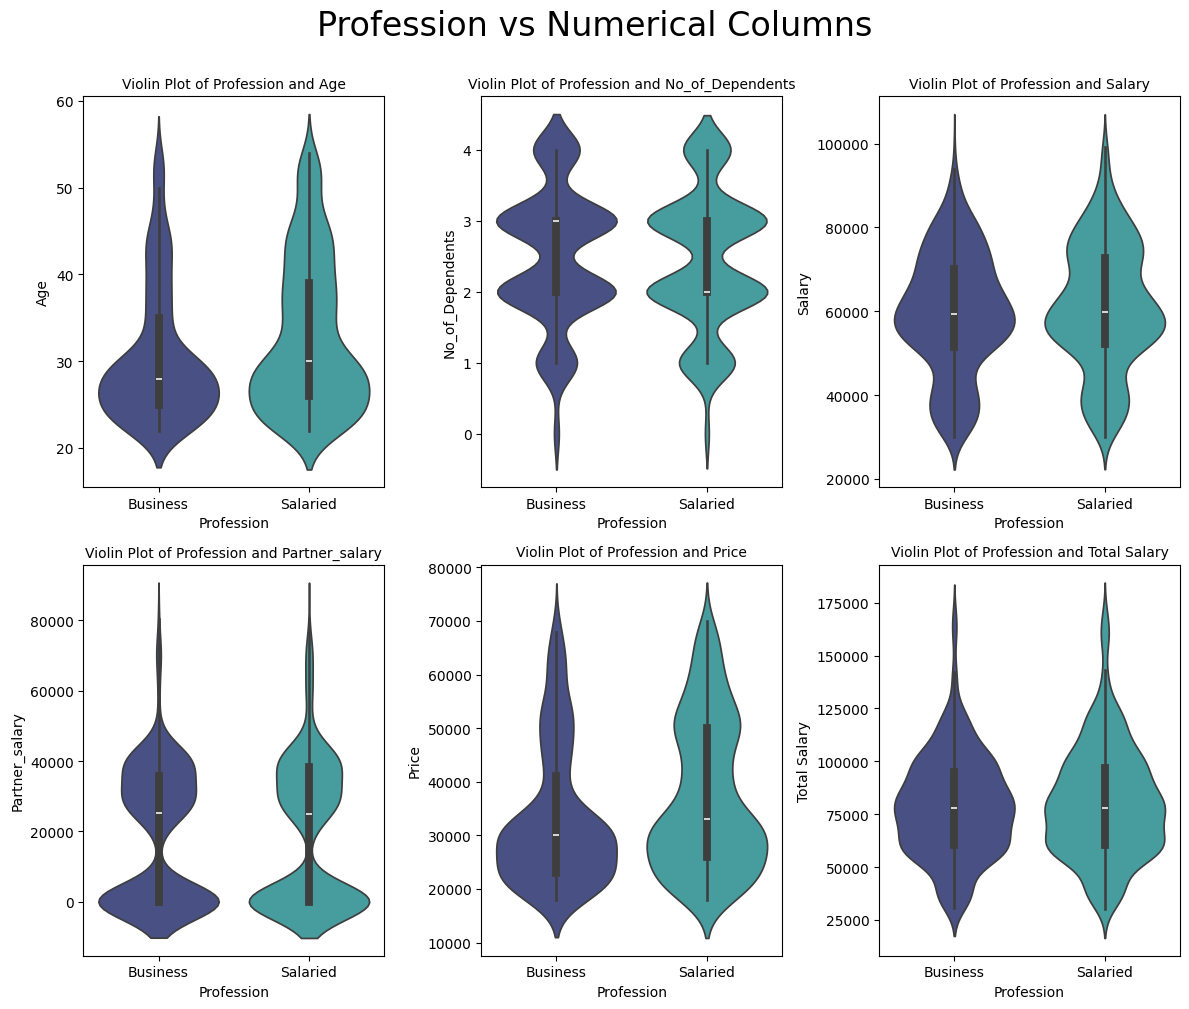

In [49]:
# Setting up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10));

# Bivariate analysis: Profession vs Numerical variables
for i, num_col in enumerate(numerical_cols):
    sns.violinplot(x='Profession', y=num_col, data=df, palette='mako',ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Violin Plot of Profession and {num_col}',fontsize=10)
    # axes[i//3, i%3].tick_params(axis='x', rotation=35)
fig.suptitle('Profession vs Numerical Columns', fontsize=24,y=1.005);
plt.tight_layout();

#### Marital_status vs Numerical Variables

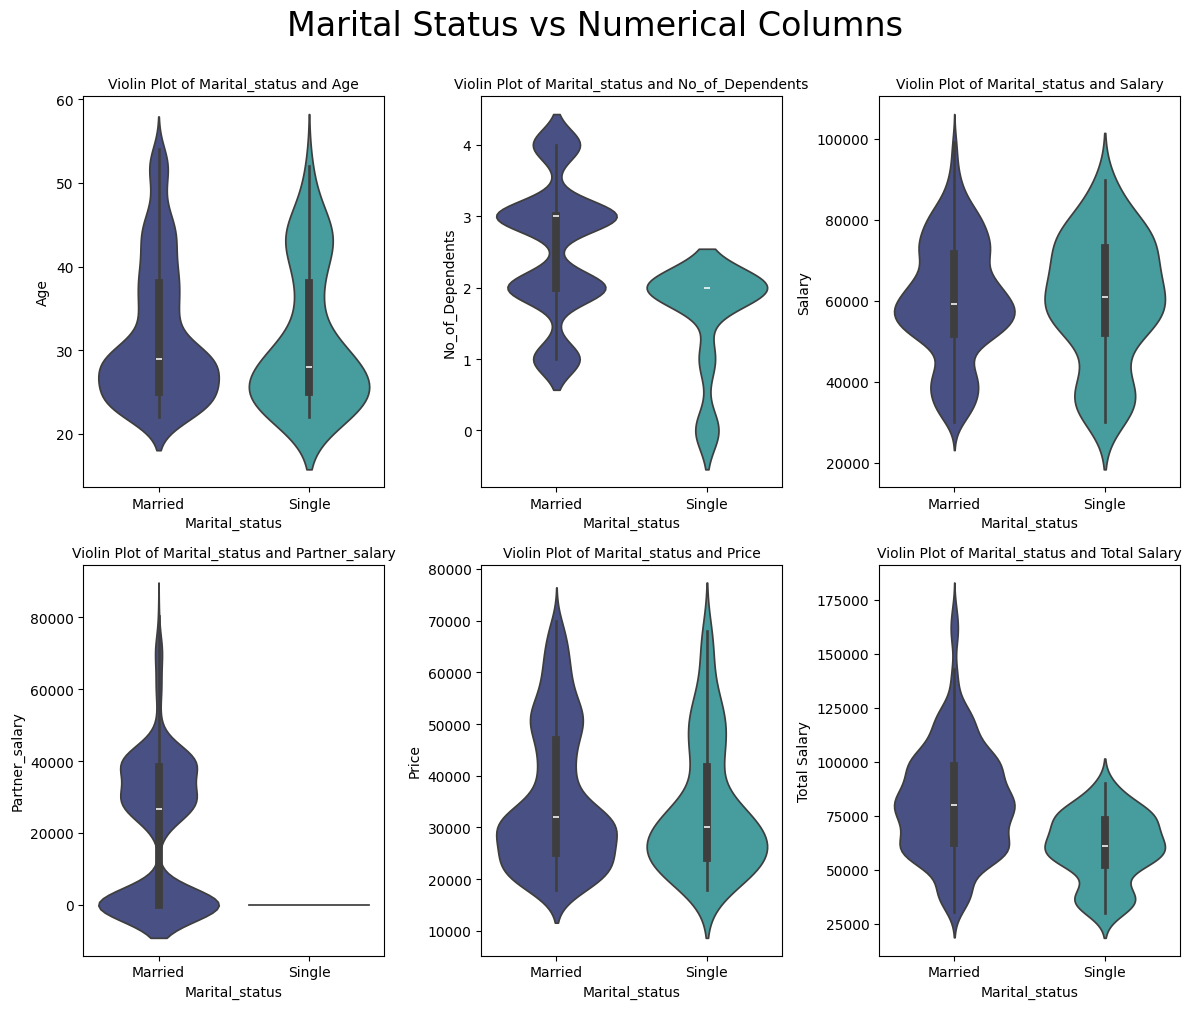

In [50]:
# Setting up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10));

# Bivariate analysis: Marital_status vs Numerical variables
for i, num_col in enumerate(numerical_cols):
    sns.violinplot(x='Marital_status', y=num_col, data=df, palette='mako',ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Violin Plot of Marital_status and {num_col}',fontsize=10)
    # axes[i//3, i%3].tick_params(axis='x', rotation=35)
fig.suptitle('Marital Status vs Numerical Columns', fontsize=24,y=1.005);
plt.tight_layout();

#### Education vs Numerical Variables

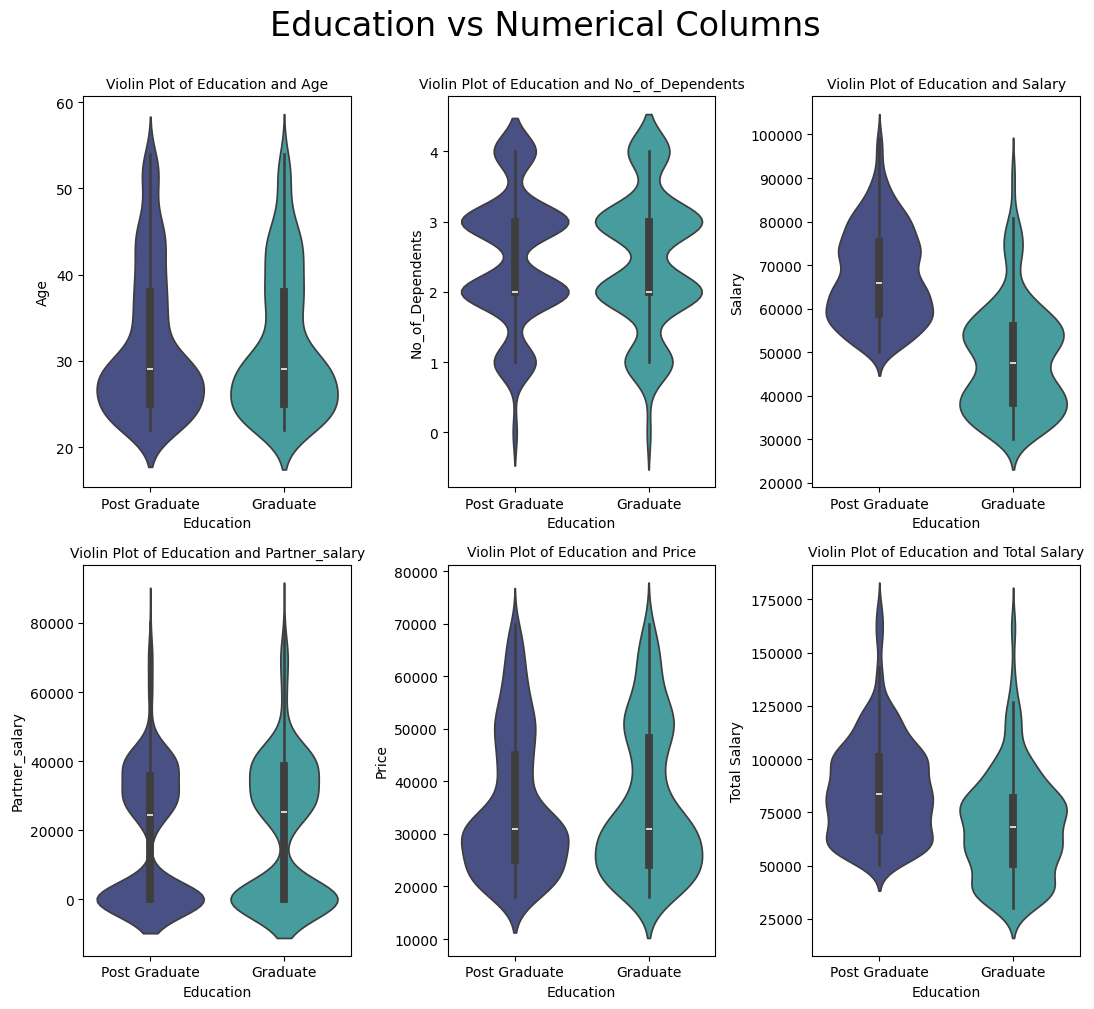

In [51]:
# Setting up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(11, 10));

# Bivariate analysis: Education vs Numerical variables
for i, num_col in enumerate(numerical_cols):
    sns.violinplot(x='Education', y=num_col, data=df, palette='mako',ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Violin Plot of Education and {num_col}',fontsize=10)
    # axes[i//3, i%3].tick_params(axis='x', rotation=35)
fig.suptitle('Education vs Numerical Columns', fontsize=24,y=1.005);
plt.tight_layout();

#### Personal_loan vs Numerical variables

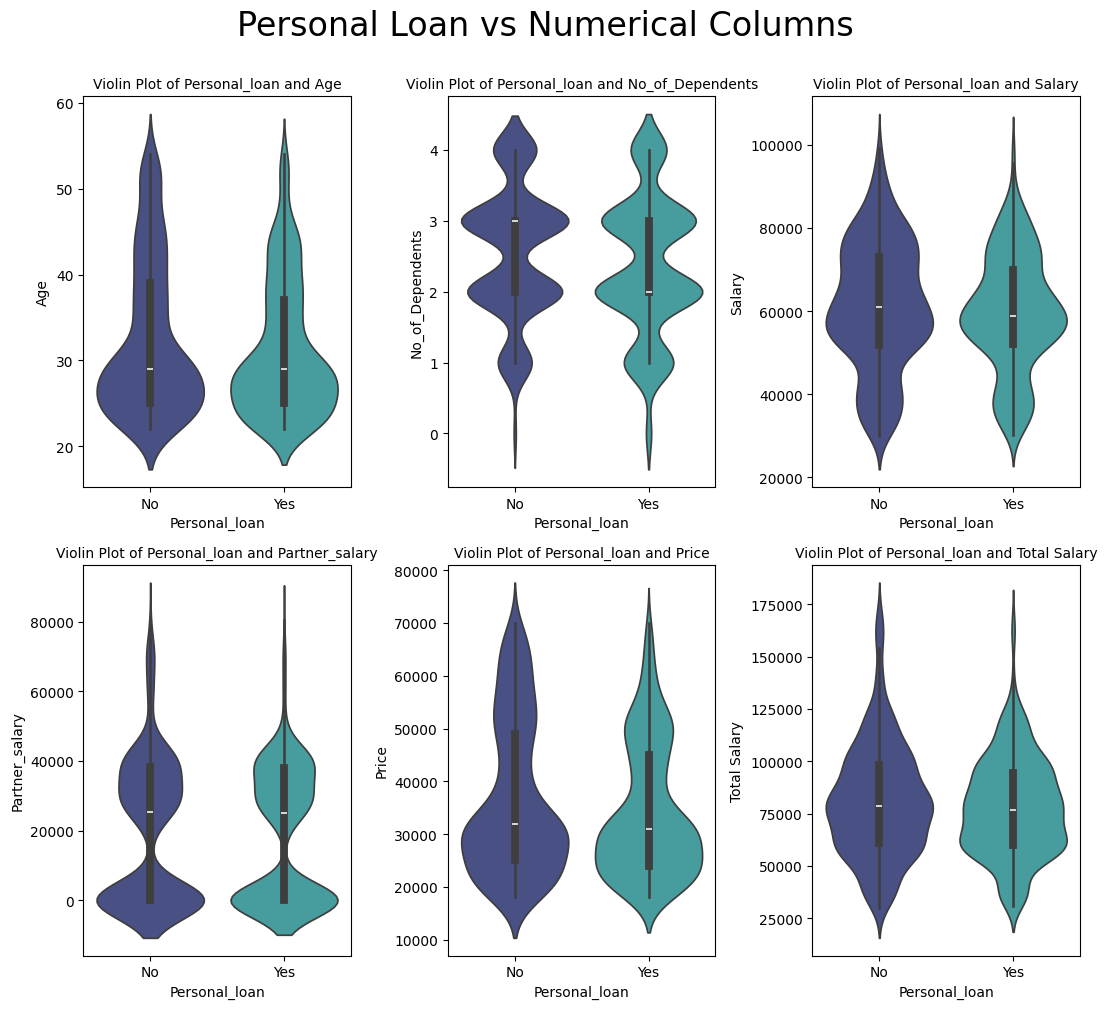

In [52]:
# Setting up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(11, 10));

# Bivariate analysis: Personal_loan vs Numerical variables
for i, num_col in enumerate(numerical_cols):
    sns.violinplot(x='Personal_loan', y=num_col, data=df, palette='mako',ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Violin Plot of Personal_loan and {num_col}',fontsize=10)
    # axes[i//3, i%3].tick_params(axis='x', rotation=35)
fig.suptitle('Personal Loan vs Numerical Columns', fontsize=24,y=1.005);
plt.tight_layout();

#### House_loan vs Numerical variables

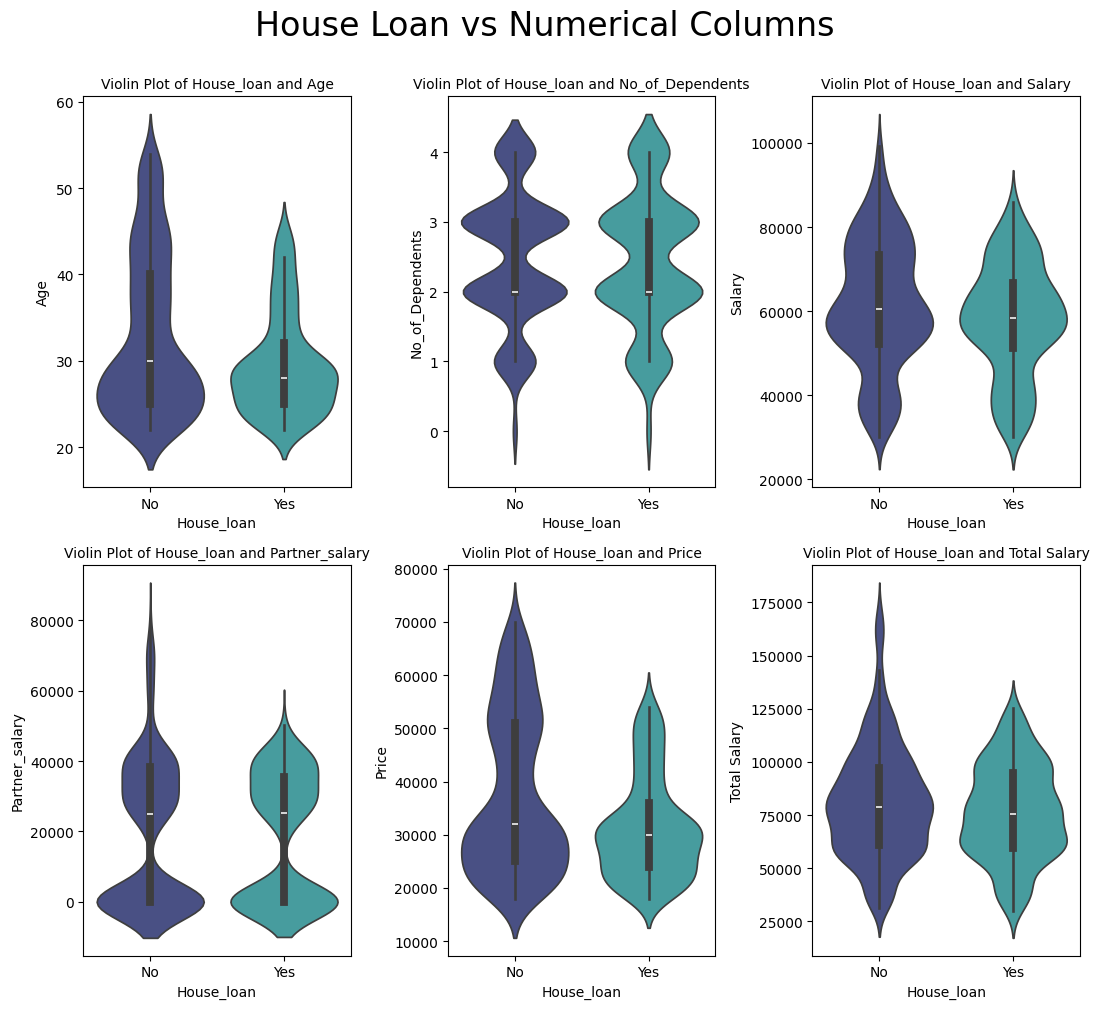

In [53]:
# Setting up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(11, 10));

# Bivariate analysis: House_loan vs Numerical variables
for i, num_col in enumerate(numerical_cols):
    sns.violinplot(x='House_loan', y=num_col, data=df, palette='mako',ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Violin Plot of House_loan and {num_col}',fontsize=10)
    # axes[i//3, i%3].tick_params(axis='x', rotation=35)
fig.suptitle('House Loan vs Numerical Columns', fontsize=24,y=1.005);
plt.tight_layout();

#### Partner_working vs Numerical variables

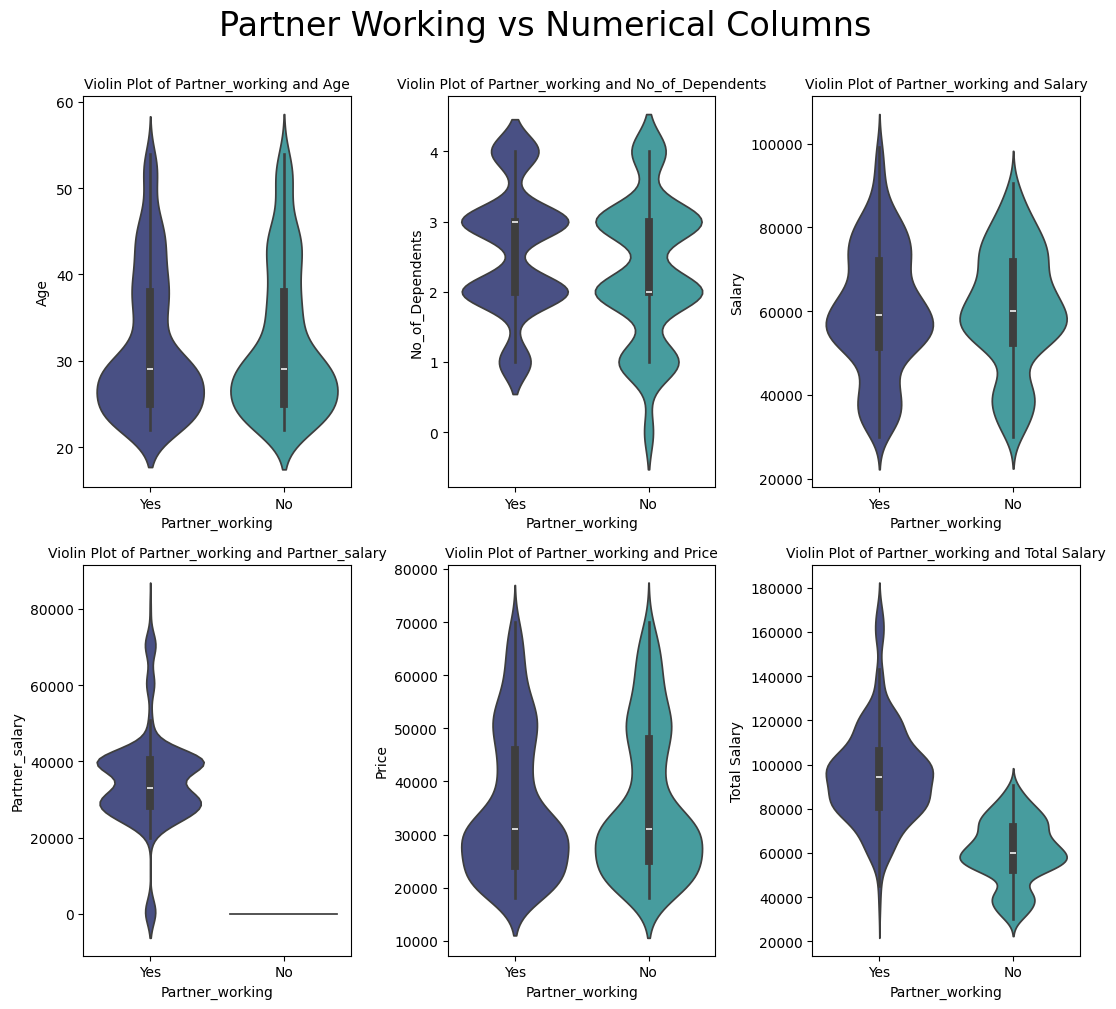

In [54]:
# Setting up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(11, 10));

# Bivariate analysis: Partner_working vs Numerical variables
for i, num_col in enumerate(numerical_cols):
    sns.violinplot(x='Partner_working', y=num_col, data=df, palette='mako',ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Violin Plot of Partner_working and {num_col}',fontsize=10)
    # axes[i//3, i%3].tick_params(axis='x', rotation=35)
fig.suptitle('Partner Working vs Numerical Columns', fontsize=24,y=1.005);
plt.tight_layout();

#### Make vs Numerical variables

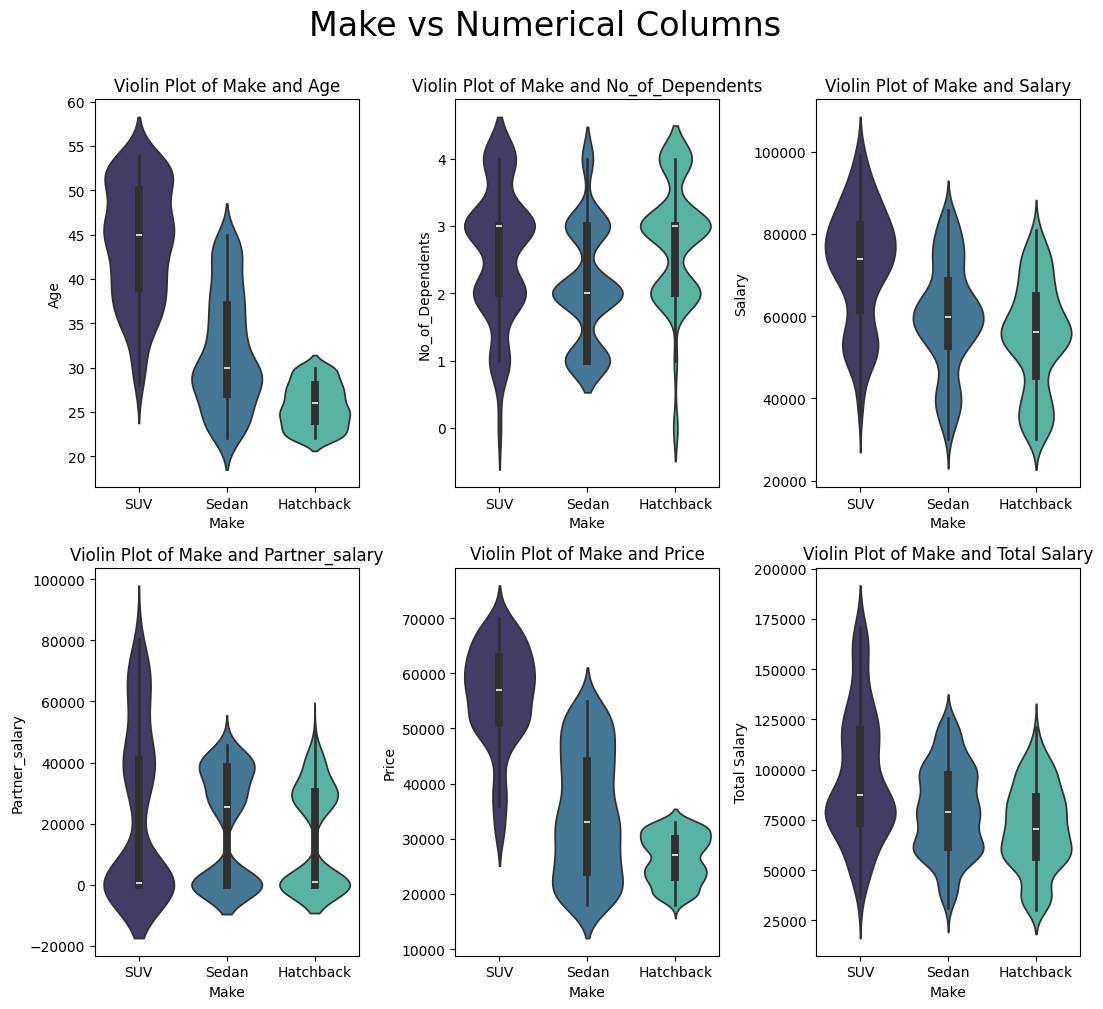

In [55]:
# Setting up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(11, 10));

# Bivariate analysis: Make vs Numerical variables
for i, num_col in enumerate(numerical_cols):
    sns.violinplot(x='Make', y=num_col, data=df, palette='mako',ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Violin Plot of Make and {num_col}')
    # axes[i//3, i%3].tick_params(axis='x', rotation=35)
fig.suptitle('Make vs Numerical Columns', fontsize=24,y=1.005);
plt.tight_layout();

### Problem 1 - Key Questions
#####  Explore the data to answer the following key questions:
1. Do men tend to prefer SUVs more compared to women?
2. What is the likelihood of a salaried person buying a Sedan?
3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?
4. How does the the amount spent on purchasing automobiles vary by gender?
5. How much money was spent on purchasing automobiles by individuals who took a personal loan?
6. How does having a working partner influence the purchase of higher-priced cars?

#### 1) Do men tend to prefer SUVs more compared to women?

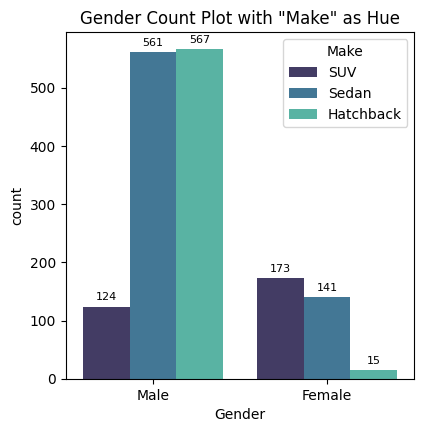

In [56]:
plt.figure(figsize=(4.5,4.5))
ax = sns.countplot(data=df, x='Gender', hue='Make', palette='mako')

for bar in ax.containers:
    ax.bar_label(bar, label_type='edge', fontsize=8, color='black', padding=3)

plt.title('Gender Count Plot with "Make" as Hue');

#### 2) What is the likelihood of a salaried person buying a Sedan?

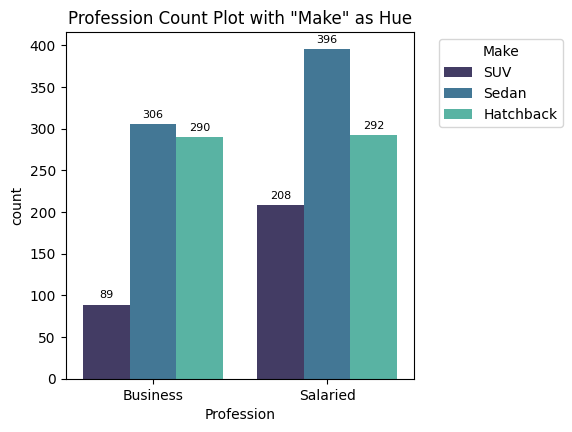

In [57]:
plt.figure(figsize=(4.5,4.5))
ax = sns.countplot(data=df, x='Profession', hue='Make', palette='mako')


for bar in ax.containers:
    ax.bar_label(bar, label_type='edge', fontsize=8, color='black', padding=3)

plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Profession Count Plot with "Make" as Hue');

In [58]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Price', 'Make', 'Total Salary'],
      dtype='object')

#### 3) What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

##### We can clearly see from the below catplot that Salaried males mostly prefer Sedan type of cars over SUVs. So, from this we can conclude that sheldon's claim is **incorrect**

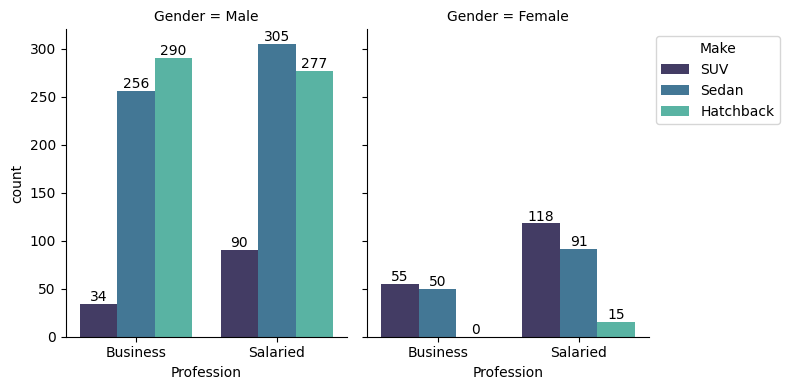

In [36]:
ax = sns.catplot(data=df, x='Profession', hue='Make', col='Gender', kind='count', palette='mako', height=4, aspect=1, legend=False, col_order=['Male', 'Female'])

for ax in ax.axes.flat:
    for p in ax.patches:
        height = p.get_height() if not np.isnan(p.get_height()) else 0
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.legend(title='Make', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

#### 4) How does the the amount spent on purchasing automobiles vary by gender?

In [60]:
df.groupby(['Gender','Make'])['Price'].median()

Gender  Make     
Female  Hatchback    28000.0
        SUV          55000.0
        Sedan        43000.0
Male    Hatchback    26000.0
        SUV          59000.0
        Sedan        31000.0
Name: Price, dtype: float64

In [61]:
df.groupby(['Gender','Make'])['Price'].mean()

Gender  Make     
Female  Hatchback    27466.666667
        SUV          53479.768786
        Sedan        42773.049645
Male    Hatchback    26447.971781
        SUV          59096.774194
        Sedan        32550.802139
Name: Price, dtype: float64

In [62]:
df.groupby(['Gender','Make'])['Price'].sum()

Gender  Make     
Female  Hatchback      412000
        SUV           9252000
        Sedan         6031000
Male    Hatchback    14996000
        SUV           7328000
        Sedan        18261000
Name: Price, dtype: int64

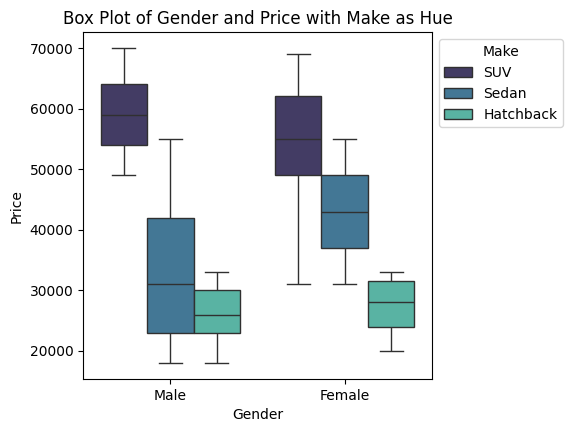

In [63]:
plt.figure(figsize=(4.5, 4.5))
ax = sns.boxplot(data=df, x='Gender', y='Price', hue='Make', palette='mako')

plt.legend(title='Make', bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Box Plot of Gender and Price with Make as Hue');

#### 5) How much money was spent on purchasing automobiles by individuals who took a personal loan?

In [109]:
df.groupby(['Personal_loan','Make'])['Price'].sum()

Personal_loan  Make     
No             Hatchback     7765000
               SUV          10373000
               Sedan        10852000
Yes            Hatchback     7643000
               SUV           6207000
               Sedan        13440000
Name: Price, dtype: int64

In [110]:
df.groupby(['Personal_loan'])['Price'].sum()

Personal_loan
No     28990000
Yes    27290000
Name: Price, dtype: int64

#### 6) How does having a working partner influence the purchase of higher-priced cars?

In [66]:
df.groupby(['Partner_working','Make'])['Price'].median()

Partner_working  Make     
No               Hatchback    26000.0
                 SUV          58000.0
                 Sedan        34000.0
Yes              Hatchback    28000.0
                 SUV          57000.0
                 Sedan        33000.0
Name: Price, dtype: float64

In [113]:
df['Partner_working'].value_counts()

Yes    868
No     713
Name: Partner_working, dtype: int64

In [68]:
result = df.groupby(['Partner_working', 'Make']).agg({'Price': ['max', 'count']}).reset_index()
result.columns = ['Partner_working', 'Make', 'Max_Price', 'Count']
print(result)

  Partner_working       Make  Max_Price  Count
0              No  Hatchback      33000    281
1              No        SUV      70000    144
2              No      Sedan      55000    288
3             Yes  Hatchback      33000    301
4             Yes        SUV      70000    153
5             Yes      Sedan      55000    414


In [69]:
df.groupby(['Partner_working'])['Price'].sum()

Partner_working
No     25668000
Yes    30612000
Name: Price, dtype: int64

In [70]:
df.groupby(['Partner_working','Make'])['Price'].sum()

Partner_working  Make     
No               Hatchback     7397000
                 SUV           8089000
                 Sedan        10182000
Yes              Hatchback     8011000
                 SUV           8491000
                 Sedan        14110000
Name: Price, dtype: int64

### Problem 1 - Actionable Insights & Recommendations
#####  Actionable Insights - Business Recommendations

#### **Insights and Recommendations:**

##### 1. The scatter plot shows that as total salary increases, people tend to spend more on cars. This suggests that those with higher incomes often buy pricier vehicles.
##### 2. The number of dependents can influence how customers manage their money.
##### 3. Men are the main customers, whether they are married or single.
##### 4. Businesswomen don't seem interested in Hatchbacks. The company should take note of this and adjust its strategies accordingly.
##### 5. Married men tend to prefer Sedans and Hatchbacks, probably because of financial obligations like loans. Offering discounts on SUVs could appeal to them as they are more spacious and may better suit their family needs.
##### 6. Use the insights from salary, gender, and car make to tailor marketing approaches for potential customers.
##### 7. Focus marketing efforts on attracting more female and unmarried customers, and boost SUV sales.
##### 8. Customers with higher salaries often consider buying more expensive items.
##### 9. The number of dependents can affect how customers manage their finances.
##### 10. Stay updated on market trends and competitor activities to stay competitive in the industry.


##### These insights and recommendations can help inform strategic decisions and marketing strategies for Austo Automobiles.tomobiles.

## Problem 2

### Context
##### GODIGT Bank, a mid-sized private bank, is reevaluating its credit card policy to address high attrition rates. The aim is to ensure customers receive the most suitable cards, aligning with their spending habits and intentions, for more profitable relationships.

### Objective
##### To find the key variables that have a vital impact on the analysis which will help the company to improve the business.

In [71]:
#Reading the dataset
bank_data = pd.read_excel('/content/Dataset 2_Godigt.xlsx')
bank_data.head()

userid              card_no  card_bin_no Issuer   card_type  \
0       1  4384 39XX XXXX XXXX       438439   Visa        edge   
1       2  4377 48XX XXXX XXXX       437748   Visa  prosperity   
2       3  4377 48XX XXXX XXXX       437748   Visa     rewards   
3       4  4258 06XX XXXX XXXX       425806   Visa   indianoil   
4       5  4377 48XX XXXX XXXX       437748   Visa        edge   

  card_source_date high_networth  active_30  active_60  active_90  ...  \
0       2019-09-29             B          0          1          1  ...   
1       2002-10-30             A          1          1          1  ...   
2       2013-10-05             C          0          0          0  ...   
3       1999-06-01             E          0          1          1  ...   
4       2006-06-13             B          1          1          1  ...   

   bank_vintage  T+1_month_activity  T+2_month_activity T+3_month_activity  \
0            27                   0                   0                  0   
1            52                   0                   0                  0   
2            23                   1                   0                  0   
3            49                   0                   0                  1   
4            21                   1                   0                  0   

   T+6_month_activity  T+12_month_activity  Transactor_revolver  \
0                   0                    0                    T   
1                   0                    0                    R   
2                   0                    0                    R   
3                   0                    0                    T   
4                   0                    0                    T   

  avg_spends_l3m  Occupation_at_source  cc_limit  
0          27729         Self Employed    290000  
1         280854                     0    950000  
2          70587               Student    210000  
3           9156         Self Employed     80000  
4          38108              Salaried    220000  

[5 rows x 28 columns]

In [72]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [73]:
bank_data.describe().T

count          mean           std       min  \
userid                   8448.0  4.224500e+03  2.438872e+03       1.0   
card_bin_no              8448.0  4.367470e+05  3.048975e+04  376916.0   
active_30                8448.0  2.923769e-01  4.548815e-01       0.0   
active_60                8448.0  4.947917e-01  5.000025e-01       0.0   
active_90                8448.0  6.420455e-01  4.794271e-01       0.0   
cc_active30              8448.0  2.840909e-01  4.510070e-01       0.0   
cc_active60              8448.0  4.844934e-01  4.997891e-01       0.0   
cc_active90              8448.0  6.323390e-01  4.821970e-01       0.0   
widget_products          8448.0  3.614583e+00  2.273193e+00       0.0   
engagement_products      8448.0  3.991714e+00  2.572022e+00       0.0   
annual_income_at_source  8448.0  1.674595e+06  1.064307e+06  200095.0   
bank_vintage             8448.0  3.316418e+01  1.586834e+01       6.0   
T+1_month_activity       8448.0  1.112689e-01  3.144835e-01       0.0   
T+2_month_activity       8448.0  4.794034e-02  2.136527e-01       0.0   
T+3_month_activity       8448.0  8.037405e-02  2.718875e-01       0.0   
T+6_month_activity       8448.0  8.877841e-03  9.380867e-02       0.0   
T+12_month_activity      8448.0  9.469697e-03  9.685625e-02       0.0   
avg_spends_l3m           8448.0  4.952737e+04  4.624495e+04       0.0   
cc_limit                 8448.0  2.517069e+05  2.291149e+05       0.0   

                                25%        50%         75%        max  
userid                      2112.75     4224.5     6336.25     8448.0  
card_bin_no               426241.00   437551.0   438439.00   524178.0  
active_30                      0.00        0.0        1.00        1.0  
active_60                      0.00        0.0        1.00        1.0  
active_90                      0.00        1.0        1.00        1.0  
cc_active30                    0.00        0.0        1.00        1.0  
cc_active60                    0.00        0.0        1.00        1.0  
cc_active90                    0.00        1.0        1.00        1.0  
widget_products                2.00        4.0        6.00        7.0  
engagement_products            2.00        4.0        6.00        8.0  
annual_income_at_source  1061104.00  1372133.5  1881734.25  4999508.0  
bank_vintage                  19.00       33.0       47.00       60.0  
T+1_month_activity             0.00        0.0        0.00        1.0  
T+2_month_activity             0.00        0.0        0.00        1.0  
T+3_month_activity             0.00        0.0        0.00        1.0  
T+6_month_activity             0.00        0.0        0.00        1.0  
T+12_month_activity            0.00        0.0        0.00        1.0  
avg_spends_l3m             17110.00    37943.0    66095.75   289292.0  
cc_limit                   90000.00   150000.0   350000.00   990000.0

In [74]:
bank_data.shape

(8448, 28)

##### There are 8448 rows and 28 columns in the dataset

In [75]:
bank_data.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

##### From the above we can see that there are 38 missing values in the Transactor_revolver column. Since Transactor_revolver is a categorical column, we will impute the missing values with mode

In [76]:
bank_data['Transactor_revolver'].mode()

0    T
Name: Transactor_revolver, dtype: object

In [77]:
# Imputing Transactor_revolver missing values with mode
bank_data['Transactor_revolver'] = bank_data['Transactor_revolver'].fillna(bank_data['Transactor_revolver'].mode()[0])

In [78]:
# Checking for null values after imputation
bank_data.isnull().sum()

userid                     0
card_no                    0
card_bin_no                0
Issuer                     0
card_type                  0
card_source_date           0
high_networth              0
active_30                  0
active_60                  0
active_90                  0
cc_active30                0
cc_active60                0
cc_active90                0
hotlist_flag               0
widget_products            0
engagement_products        0
annual_income_at_source    0
other_bank_cc_holding      0
bank_vintage               0
T+1_month_activity         0
T+2_month_activity         0
T+3_month_activity         0
T+6_month_activity         0
T+12_month_activity        0
Transactor_revolver        0
avg_spends_l3m             0
Occupation_at_source       0
cc_limit                   0
dtype: int64

##### We can see that there are no null values in the data after imputation

In [79]:
bank_data.duplicated().sum()

0

##### There are no duplicates in the dataset

In [80]:
bank_data['Occupation_at_source'].value_counts()

Salaried         3918
Self Employed    2175
Retired          1089
Student           621
Housewife         384
0                 261
Name: Occupation_at_source, dtype: int64

##### We have discrepency here as 0. Since occupation is a categorical variable, we will replace the values of 0 with the mode of Occupation i.e., Salaried

In [81]:
bank_data['Occupation_at_source'] = np.where(bank_data['Occupation_at_source']==0,'Salaried',bank_data['Occupation_at_source'])

In [82]:
bank_data['Occupation_at_source'].value_counts()

Salaried         4179
Self Employed    2175
Retired          1089
Student           621
Housewife         384
Name: Occupation_at_source, dtype: int64

##### We have converted all the 0 values to Salaried

#### Lets visualize the data

In [83]:
bank_data.columns

Index(['userid', 'card_no', 'card_bin_no', 'Issuer', 'card_type',
       'card_source_date', 'high_networth', 'active_30', 'active_60',
       'active_90', 'cc_active30', 'cc_active60', 'cc_active90',
       'hotlist_flag', 'widget_products', 'engagement_products',
       'annual_income_at_source', 'other_bank_cc_holding', 'bank_vintage',
       'T+1_month_activity', 'T+2_month_activity', 'T+3_month_activity',
       'T+6_month_activity', 'T+12_month_activity', 'Transactor_revolver',
       'avg_spends_l3m', 'Occupation_at_source', 'cc_limit'],
      dtype='object')

In [84]:
cat_cols = bank_data.select_dtypes(include='object')
cat_cols.columns

Index(['card_no', 'Issuer', 'card_type', 'high_networth', 'hotlist_flag',
       'other_bank_cc_holding', 'Transactor_revolver', 'Occupation_at_source'],
      dtype='object')

##### Since card_no is of no use here for analysis, we will ignore that column.

In [85]:
cat_cols = cat_cols.iloc[:, 1:]
cat_cols.columns

Index(['Issuer', 'card_type', 'high_networth', 'hotlist_flag',
       'other_bank_cc_holding', 'Transactor_revolver', 'Occupation_at_source'],
      dtype='object')

In [86]:
#Removing Hotlist flag as all the values are N in the dataset
cat_cols.drop('hotlist_flag', axis=1, inplace=True)
cat_cols.columns

Index(['Issuer', 'card_type', 'high_networth', 'other_bank_cc_holding',
       'Transactor_revolver', 'Occupation_at_source'],
      dtype='object')

In [87]:
num_cols = bank_data.select_dtypes(include=['int','float'])
print(num_cols.columns,'\n')
print(len(num_cols.columns))

Index(['userid', 'card_bin_no', 'active_30', 'active_60', 'active_90',
       'cc_active30', 'cc_active60', 'cc_active90', 'widget_products',
       'engagement_products', 'annual_income_at_source', 'bank_vintage',
       'T+1_month_activity', 'T+2_month_activity', 'T+3_month_activity',
       'T+6_month_activity', 'T+12_month_activity', 'avg_spends_l3m',
       'cc_limit'],
      dtype='object') 

19


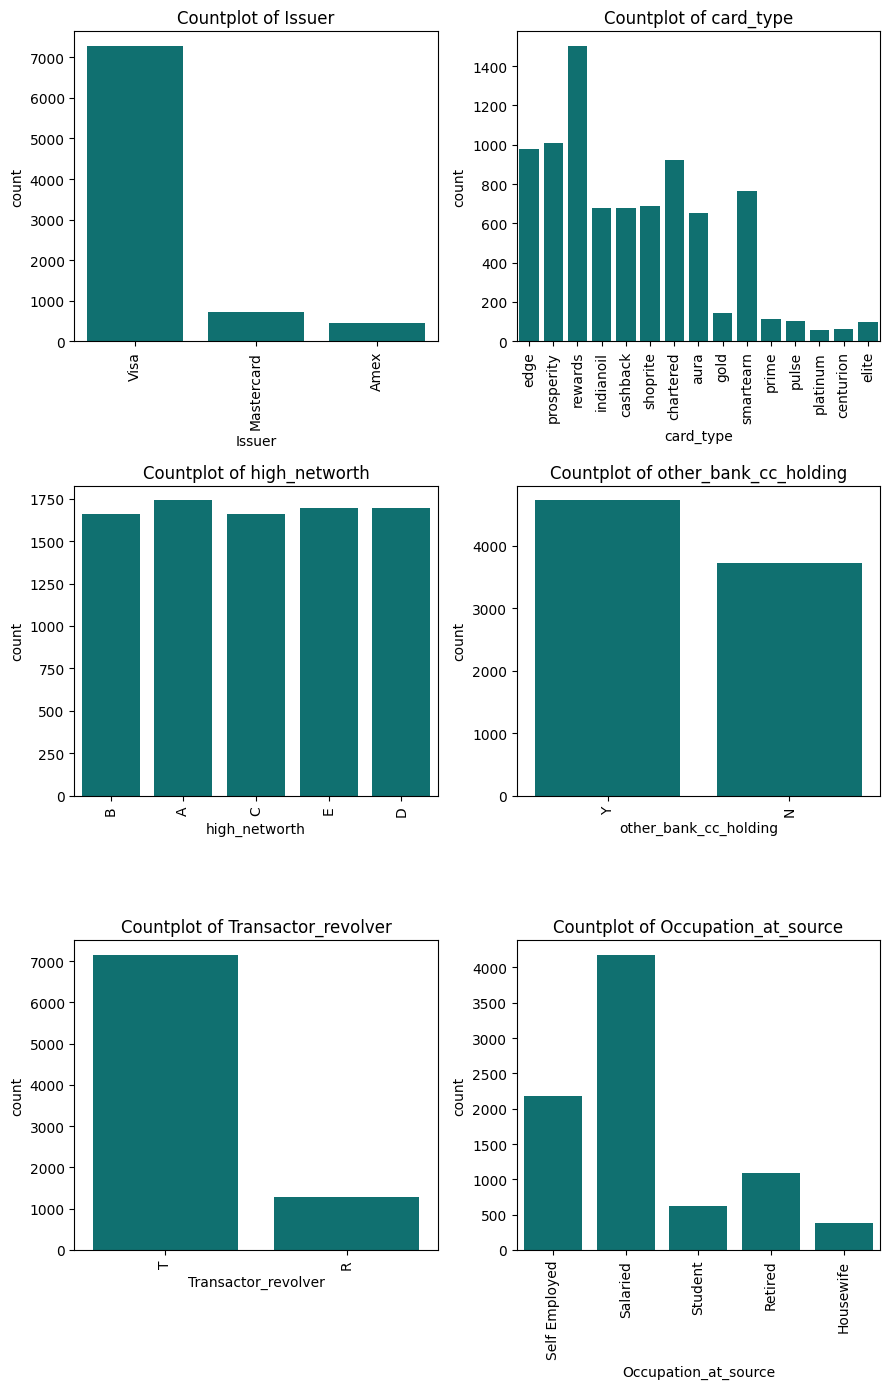

In [88]:
# Setting up the subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 14))

# Create count plots for categorical columns
for i, col in enumerate(cat_cols.columns):
    sns.countplot(data=bank_data, x=col, ax=axes[i//2, i%2], color='teal')
    axes[i//2, i%2].set_title(f'Countplot of {col}')
    axes[i//2, i%2].tick_params(axis='x', rotation=90)

plt.tight_layout()

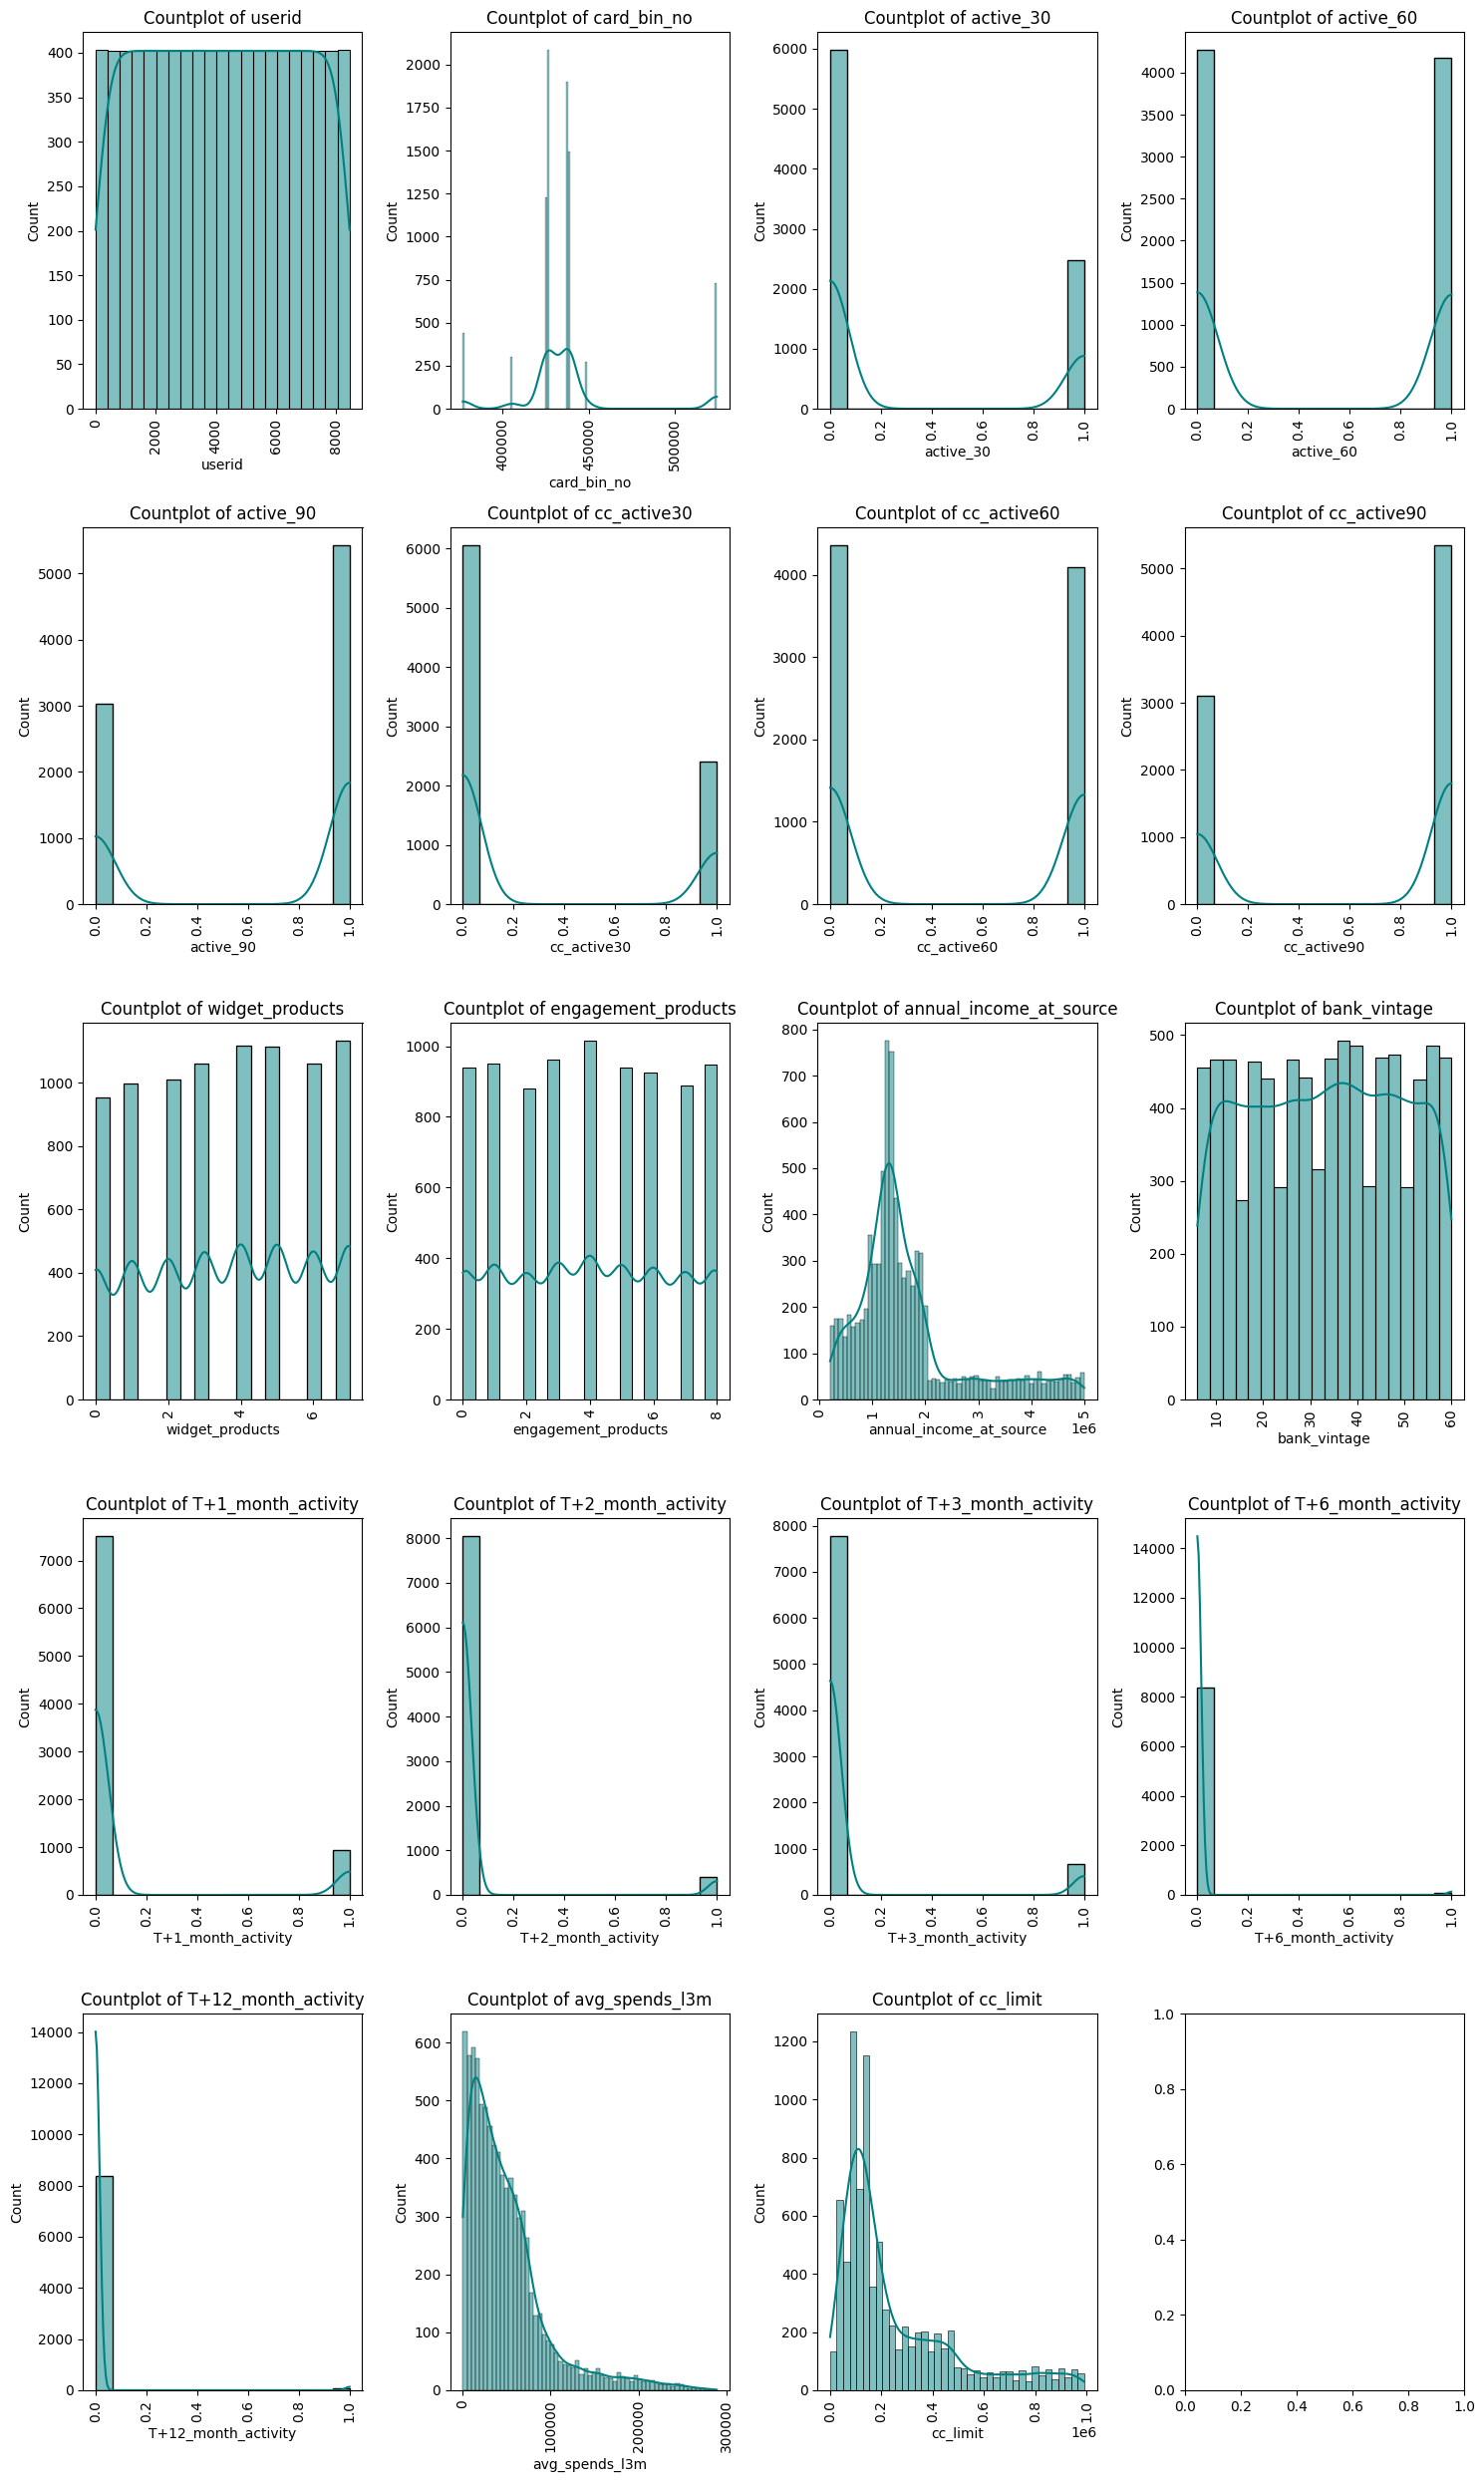

In [89]:
# Setting up the subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 25))

# Create count plots for numerical columns
for i, col in enumerate(num_cols.columns):
    sns.histplot(data=bank_data, x=col, ax=axes[i//4, i%4], color='teal', kde=True)
    axes[i//4, i%4].set_title(f'Countplot of {col}')
    axes[i//4, i%4].tick_params(axis='x', rotation=90)

plt.tight_layout()

### Once the above analysis was done, listed below are some of the questions that can be raised by overlooking the dataset.
####    A.	What is the relationship between Annual income and CC limit?
    
####    B.	What is the occupation of the customers using credit cards?
    
####    C.	How much does customers from each occupation spent on last 3 months?
    
####    D.	How much credit cards issued with respect to card category and occupation?
    
####    E.	Which type of card has been issued the most?


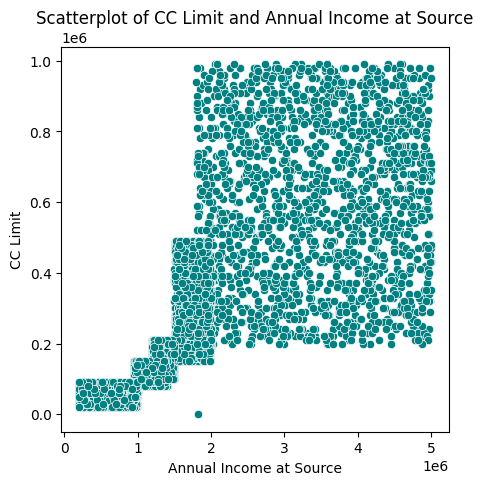

In [90]:
# A. What is the relationship between Annual income and CC limit?
plt.figure(figsize=(5,5));
sns.scatterplot(data = bank_data, x='annual_income_at_source',y='cc_limit', color='teal');

plt.title('Scatterplot of CC Limit and Annual Income at Source');
plt.xlabel('Annual Income at Source');
plt.ylabel('CC Limit');

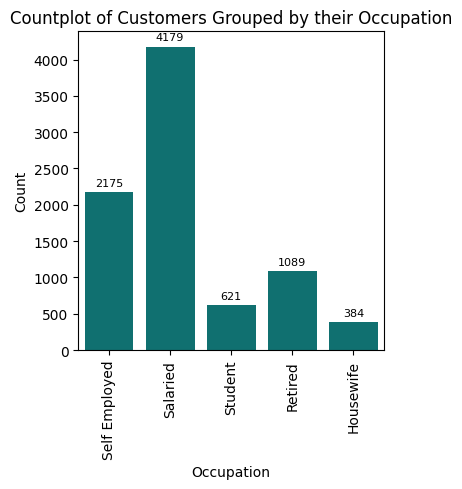

In [119]:
plt.figure(figsize=(4,5));
ax = sns.countplot(data=bank_data, x='Occupation_at_source', color='teal')

# Adding annotations
ax.bar_label(ax.containers[0], label_type='edge', fontsize=8, color='black', padding=3)

plt.title('Countplot of Customers Grouped by their Occupation')
plt.xticks(rotation=90)
plt.xlabel('Occupation')
plt.ylabel('Count')

plt.tight_layout()

In [92]:
temp_data = bank_data.groupby('Occupation_at_source')['avg_spends_l3m'].sum().reset_index().sort_values(by='avg_spends_l3m', ascending=False)
temp_data

Occupation_at_source  avg_spends_l3m
2             Salaried       218190279
3        Self Employed       127884163
1              Retired        31118023
4              Student        30683145
0            Housewife        10531574

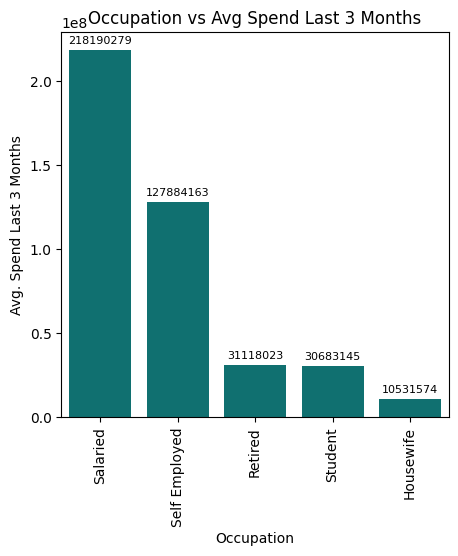

In [127]:
# C. How much does customers from each occupation spent on last 3 months?
plt.figure(figsize=(5,5));
ax = sns.barplot(data = temp_data, x='Occupation_at_source', y='avg_spends_l3m', color='teal');

# Adding annotations
ax.bar_label(ax.containers[0], label_type='edge', fmt='%d', fontsize=8, color='black', padding=3)

plt.title('Occupation vs Avg Spend Last 3 Months');
plt.xticks(rotation=90)
plt.xlabel('Occupation');
plt.ylabel('Avg. Spend Last 3 Months');

In [94]:
# D. How much credit cards issued with respect to card category and occupation?
pd.crosstab(bank_data['Occupation_at_source'],bank_data['card_type'])

card_type             aura  cashback  centurion  chartered  edge  elite  gold  \
Occupation_at_source                                                            
Housewife               38        57          1          0     0      0     6   
Retired                155       158          0          4     4      1    13   
Salaried               319       309         35        478   512     50    73   
Self Employed           87       112         23        371   382     36    40   
Student                 53        40          3         70    82      9    13   

card_type             indianoil  platinum  prime  prosperity  pulse  rewards  \
Occupation_at_source                                                           
Housewife                    46         0      0           1      1      106   
Retired                     147         0      1           2      1      279   
Salaried                    315        35     58         531     45      752   
Self Employed               126        17     46         390     43      262   
Student                      46         7      7          83     11      103   

card_type             shoprite  smartearn  
Occupation_at_source                       
Housewife                   62         66  
Retired                    152        172  
Salaried                   312        355  
Self Employed              117        123  
Student                     45         49

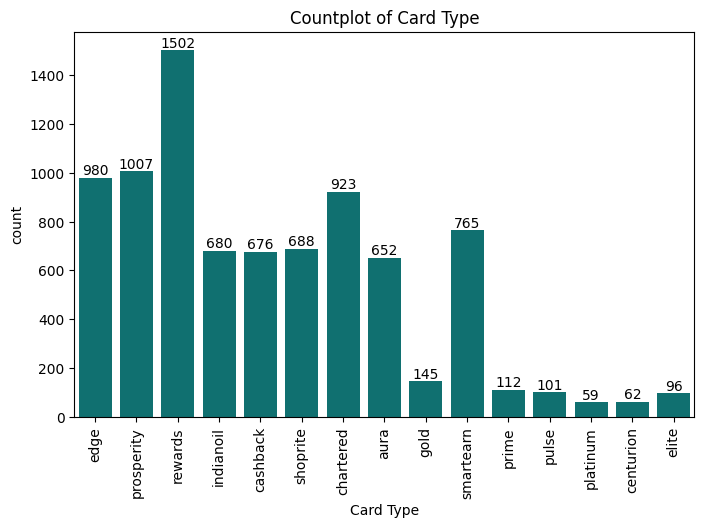

In [95]:
# E. Which type of card has been issued the most?
plt.figure(figsize=(8,5));
ax = sns.countplot(data=bank_data, x='card_type', color='teal')

plt.title('Countplot of Card Type');
plt.xticks(rotation=90)
plt.xlabel('Card Type');

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

In [96]:
num_cols = num_cols[['widget_products','engagement_products','annual_income_at_source','bank_vintage','avg_spends_l3m','cc_limit']]

In [97]:
num_cols.corr().round(2)

widget_products  engagement_products  \
widget_products                     1.00                -0.01   
engagement_products                -0.01                 1.00   
annual_income_at_source            -0.00                 0.03   
bank_vintage                        0.02                -0.02   
avg_spends_l3m                      0.01                 0.04   
cc_limit                           -0.00                 0.03   

                         annual_income_at_source  bank_vintage  \
widget_products                            -0.00          0.02   
engagement_products                         0.03         -0.02   
annual_income_at_source                     1.00         -0.00   
bank_vintage                               -0.00          1.00   
avg_spends_l3m                              0.68         -0.00   
cc_limit                                    0.77         -0.00   

                         avg_spends_l3m  cc_limit  
widget_products                    0.01     -0.00  
engagement_products                0.04      0.03  
annual_income_at_source            0.68      0.77  
bank_vintage                      -0.00     -0.00  
avg_spends_l3m                     1.00      0.53  
cc_limit                           0.53      1.00

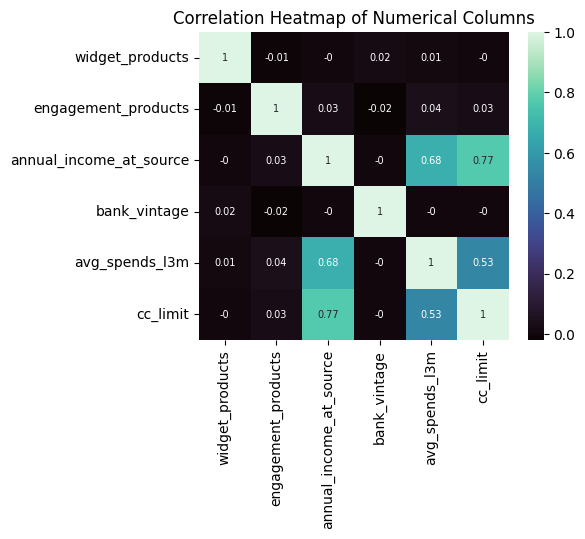

In [98]:
plt.figure(figsize=(5,4));
sns.heatmap(num_cols.corr().round(2), cmap='mako',annot=True, annot_kws={"fontsize": 7});

plt.title('Correlation Heatmap of Numerical Columns');

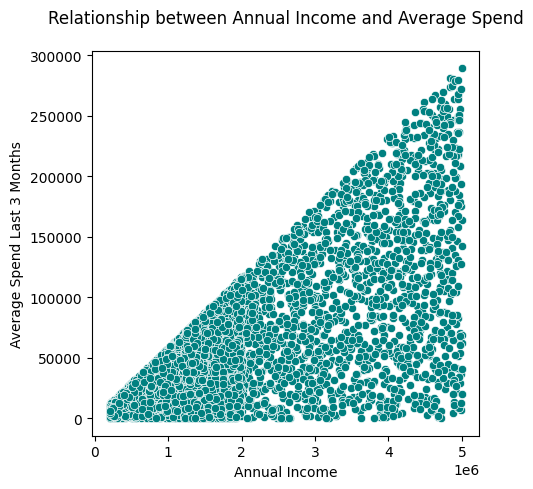

In [134]:
plt.figure(figsize=(5,5));
sns.scatterplot(data=bank_data, x='annual_income_at_source', y='avg_spends_l3m', color='teal');

plt.title('Relationship between Annual Income and Average Spend',y=1.05);
plt.xlabel('Annual Income');
plt.ylabel('Average Spend Last 3 Months');

In [100]:
# Based on the above analysis, we came up with the below variables which plays a vital role for in-depth analysis,
# •	annual_income_at_source
# •	avg_spends_l3m
# •	cc_limit
# •	Occupation_at_source
# •	card_type

# The following are five focal points for the bank to address in order to mitigate attrition:
# •	The bank should prioritize the promotion and enhancement of engagement products. These initiatives can effectively boost customer retention rates.
# •	Understanding the annual income of customers is crucial. This knowledge enables the customization of financial products and services to better suit individual needs, ultimately curbing attrition.
# •	Tailoring offerings and benefits to specific occupational groups is essential. Personalized approaches can foster stronger customer loyalty and diminish attrition rates.
# •	Providing appropriate credit card limits based on customer profiles is pivotal. This approach enhances satisfaction levels and diminishes attrition risk.
# •	Analyzing the spending behaviors of transactor revolver customers is insightful. Utilizing these insights, the bank can devise targeted retention strategies, thereby mitigating attrition.
